# Plot-3: mRDP=on/off Kinematics with ktdurham = & != TMS
Compare the kinematic properties of mRDP = on/off with cross-section unit

## 1. Import Packages

In [1]:
# The Python Standard Library
import os
import sys
import time
import datetime
import glob
import multiprocessing as mp

# The Third-Party Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import prettytable
import uproot
import pyjet
import importlib

# My Packages
import myhep.particle_information_v2 as mypiv2
import myhep.analytical_function_v2 as myafv2
import myhep.particleinfo_v1 as mypiv1
import myhep.particlefun_v1 as myafv1

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load the Data

### 2-1. main89 with pdgs=82

In [2]:
# ktdurham = 20
# ------------------------------------------------------------
# TMS = 20
df_xdxdx_23_4_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 10
df_xdxdx_23_4_20_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10_S23.csv')
df_xdxdx_71_4_20_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10_S71.csv')
analyzed_data_4_20_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10.npz')
analyzed_data_Weight_4_20_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_20_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10_S23.csv')
df_xdxdx_71_8_20_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10_S71.csv')
analyzed_data_8_20_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10.npz')
analyzed_data_Weight_8_20_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 30
df_xdxdx_23_4_20_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S23.csv')
df_xdxdx_71_4_20_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S71.csv')
analyzed_data_4_20_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30.npz')
analyzed_data_Weight_4_20_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_20_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S23.csv')
df_xdxdx_71_8_20_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S71.csv')
analyzed_data_8_20_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30.npz')
analyzed_data_Weight_8_20_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_Weight.npz', allow_pickle=True)
# ============================================================


# ktdurham = 50 using iseed 2
# ------------------------------------------------------------
# TMS = 50
df_xdxdx_23_4_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 30
df_xdxdx_23_4_50_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S23.csv')
df_xdxdx_71_4_50_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S71.csv')
analyzed_data_4_50_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30.npz')
analyzed_data_Weight_4_50_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_50_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S23.csv')
df_xdxdx_71_8_50_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S71.csv')
analyzed_data_8_50_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30.npz')
analyzed_data_Weight_8_50_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 70
df_xdxdx_23_4_50_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70_S23.csv')
df_xdxdx_71_4_50_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70_S71.csv')
analyzed_data_4_50_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70.npz')
analyzed_data_Weight_4_50_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_50_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70_S23.csv')
df_xdxdx_71_8_50_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70_S71.csv')
analyzed_data_8_50_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70.npz')
analyzed_data_Weight_8_50_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70_Weight.npz', allow_pickle=True)

In [3]:
print(analyzed_data_4_20_10.files)
print(analyzed_data_Weight_4_20_10.files)

['truth_jet', 'truth_jet_filterDM', 'truth_MET', 'detector_jet']
['weight']


In [4]:
# ktdurham = 20
# ------------------------------------------------------------
# TMS = 20
M_xdxdx_23_4_20 = df_xdxdx_23_4_20['M_xdxdx'].to_numpy()
M_xdxdx_23_8_20 = df_xdxdx_23_8_20['M_xdxdx'].to_numpy()

# TMS = 10
M_xdxdx_23_4_20_10 = df_xdxdx_23_4_20_10['M_xdxdx'].to_numpy()
M_xdxdx_23_8_20_10 = df_xdxdx_23_8_20_10['M_xdxdx'].to_numpy()

# TMS = 30
M_xdxdx_23_4_20_30 = df_xdxdx_23_4_20_30['M_xdxdx'].to_numpy()
M_xdxdx_23_8_20_30 = df_xdxdx_23_8_20_30['M_xdxdx'].to_numpy()
# ============================================================


# ktdurham = 50 using iseed 2
# ------------------------------------------------------------
# TMS = 50
M_xdxdx_23_4_50 = df_xdxdx_23_4_50['M_xdxdx'].to_numpy()
M_xdxdx_23_8_50 = df_xdxdx_23_8_50['M_xdxdx'].to_numpy()

# TMS = 30
M_xdxdx_23_4_50_30 = df_xdxdx_23_4_50_30['M_xdxdx'].to_numpy()
M_xdxdx_23_8_50_30 = df_xdxdx_23_8_50_30['M_xdxdx'].to_numpy()

# TMS = 70
M_xdxdx_23_4_50_70 = df_xdxdx_23_4_50_70['M_xdxdx'].to_numpy()
M_xdxdx_23_8_50_70 = df_xdxdx_23_8_50_70['M_xdxdx'].to_numpy()

In [5]:
# ktdurham = 20
# ------------------------------------------------------------
# TMS = 20
truth_jet_filterDM_4_20 = analyzed_data_4_20['truth_jet_filterDM']
truth_MET_4_20 = analyzed_data_4_20['truth_MET']
weight_4_20 = analyzed_data_Weight_4_20['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_20 = truth_jet_filterDM_4_20[3].astype(np.int64)
s_t_MET_4_20 = truth_MET_4_20[4].astype(np.int64)

truth_jet_filterDM_8_20 = analyzed_data_8_20['truth_jet_filterDM']
truth_MET_8_20 = analyzed_data_8_20['truth_MET']
weight_8_20 = analyzed_data_Weight_8_20['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_20 = truth_jet_filterDM_8_20[3].astype(np.int64)
s_t_MET_8_20 = truth_MET_8_20[4].astype(np.int64)

# TMS = 10
truth_jet_filterDM_4_20_10 = analyzed_data_4_20_10['truth_jet_filterDM']
truth_MET_4_20_10 = analyzed_data_4_20_10['truth_MET']
weight_4_20_10 = analyzed_data_Weight_4_20_10['weight']*10000*(10**9)
s_t_j_fDM_4_20_10 = truth_jet_filterDM_4_20_10[3].astype(np.int64)
s_t_MET_4_20_10 = truth_MET_4_20_10[4].astype(np.int64)

truth_jet_filterDM_8_20_10 = analyzed_data_8_20_10['truth_jet_filterDM']
truth_MET_8_20_10 = analyzed_data_8_20_10['truth_MET']
weight_8_20_10 = analyzed_data_Weight_8_20_10['weight']*10000*(10**9)
s_t_j_fDM_8_20_10 = truth_jet_filterDM_8_20_10[3].astype(np.int64)
s_t_MET_8_20_10 = truth_MET_8_20_10[4].astype(np.int64)

# TMS = 30
truth_jet_filterDM_4_20_30 = analyzed_data_4_20_30['truth_jet_filterDM']
truth_MET_4_20_30 = analyzed_data_4_20_30['truth_MET']
weight_4_20_30 = analyzed_data_Weight_4_20_30['weight']*10000*(10**9)
s_t_j_fDM_4_20_30 = truth_jet_filterDM_4_20_30[3].astype(np.int64)
s_t_MET_4_20_30 = truth_MET_4_20_30[4].astype(np.int64)

truth_jet_filterDM_8_20_30 = analyzed_data_8_20_30['truth_jet_filterDM']
truth_MET_8_20_30 = analyzed_data_8_20_30['truth_MET']
weight_8_20_30 = analyzed_data_Weight_8_20_30['weight']*10000*(10**9)
s_t_j_fDM_8_20_30 = truth_jet_filterDM_8_20_30[3].astype(np.int64)
s_t_MET_8_20_30 = truth_MET_8_20_30[4].astype(np.int64)
# ============================================================


# ktdurham = 50 using iseed 2
# ------------------------------------------------------------
# TMS = 50
truth_jet_filterDM_4_50 = analyzed_data_4_50['truth_jet_filterDM']
truth_MET_4_50 = analyzed_data_4_50['truth_MET']
weight_4_50 = analyzed_data_Weight_4_50['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_50 = truth_jet_filterDM_4_50[3].astype(np.int64)
s_t_MET_4_50 = truth_MET_4_50[4].astype(np.int64)

truth_jet_filterDM_8_50 = analyzed_data_8_50['truth_jet_filterDM']
truth_MET_8_50 = analyzed_data_8_50['truth_MET']
weight_8_50 = analyzed_data_Weight_8_50['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_50 = truth_jet_filterDM_8_50[3].astype(np.int64)
s_t_MET_8_50 = truth_MET_8_50[4].astype(np.int64)

# TMS = 30
truth_jet_filterDM_4_50_30 = analyzed_data_4_50_30['truth_jet_filterDM']
truth_MET_4_50_30 = analyzed_data_4_50_30['truth_MET']
weight_4_50_30 = analyzed_data_Weight_4_50_30['weight']*10000*(10**9)
s_t_j_fDM_4_50_30 = truth_jet_filterDM_4_50_30[3].astype(np.int64)
s_t_MET_4_50_30 = truth_MET_4_50_30[4].astype(np.int64)

truth_jet_filterDM_8_50_30 = analyzed_data_8_50_30['truth_jet_filterDM']
truth_MET_8_50_30 = analyzed_data_8_50_30['truth_MET']
weight_8_50_30 = analyzed_data_Weight_8_50_30['weight']*10000*(10**9)
s_t_j_fDM_8_50_30 = truth_jet_filterDM_8_50_30[3].astype(np.int64)
s_t_MET_8_50_30 = truth_MET_8_50_30[4].astype(np.int64)

# TMS = 70
truth_jet_filterDM_4_50_70 = analyzed_data_4_50_70['truth_jet_filterDM']
truth_MET_4_50_70 = analyzed_data_4_50_70['truth_MET']
weight_4_50_70 = analyzed_data_Weight_4_50_70['weight']*10000*(10**9)
s_t_j_fDM_4_50_70 = truth_jet_filterDM_4_50_70[3].astype(np.int64)
s_t_MET_4_50_70 = truth_MET_4_50_70[4].astype(np.int64)

truth_jet_filterDM_8_50_70 = analyzed_data_8_50_70['truth_jet_filterDM']
truth_MET_8_50_70 = analyzed_data_8_50_70['truth_MET']
weight_8_50_70 = analyzed_data_Weight_8_50_70['weight']*10000*(10**9)
s_t_j_fDM_8_50_70 = truth_jet_filterDM_8_50_70[3].astype(np.int64)
s_t_MET_8_50_70 = truth_MET_8_50_70[4].astype(np.int64)

### 2-2. Check the information of data with pdgs=82

In [6]:
print("ktdurham = 20:")
print("+"*60)

print("TMS = 20:")
print("There are {} events in the .root file.".format(weight_4_20.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_20)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_20.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_20)[0]))
print("="*60)

print("TMS = 10:")
print("There are {} events in the .root file.".format(weight_4_20_10.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_20_10)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_20_10.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_20_10)[0]))
print("="*60)

print("TMS = 30:")
print("There are {} events in the .root file.".format(weight_4_20_30.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_20_30)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_20_30.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_20_30)[0]))
print("="*60)
print("="*60)


print("ktdurham = 50:")
print("+"*60)

print("TMS = 50:")
print("There are {} events in the .root file.".format(weight_4_50.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_50)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_50.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_50)[0]))
print("="*60)

print("TMS = 30:")
print("There are {} events in the .root file.".format(weight_4_50_30.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_50_30)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_50_30.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_50_30)[0]))
print("="*60)

print("TMS = 70:")
print("There are {} events in the .root file.".format(weight_4_50_70.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_50_70)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_50_70.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_50_70)[0]))
print("="*60)

ktdurham = 20:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TMS = 20:
There are 7322 events in the .root file.
Cross section = 1.125914225859173 pb
----------------------------------------
There are 98 events in the .root file.
Cross section = 0.012788425659692078 pb
TMS = 10:
There are 7314 events in the .root file.
Cross section = 1.1249888673145008 pb
----------------------------------------
There are 83 events in the .root file.
Cross section = 0.010806542360725264 pb
TMS = 30:
There are 6903 events in the .root file.
Cross section = 0.9947655271398825 pb
----------------------------------------
There are 122 events in the .root file.
Cross section = 0.01610906412874858 pb
ktdurham = 50:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TMS = 50:
There are 8957 events in the .root file.
Cross section = 0.8489344991817418 pb
----------------------------------------
There are 204 events in the .root file.
Cross section = 0.017210953121666803 pb
TMS = 30:
Th

#### Conclusion: The results are consistent with PYTHIA outputs.

### 2-3. main89 without pdgs=82

In [7]:
# ktdurham = 20
# ------------------------------------------------------------
# TMS = 20
df_xdxdx_23_4_20_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_20_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_20_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_20_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_20_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_20_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_20_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_20_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 10
df_xdxdx_23_4_20_10_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10_S23.csv')
df_xdxdx_71_4_20_10_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10_S71.csv')
analyzed_data_4_20_10_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10.npz')
analyzed_data_Weight_4_20_10_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms10_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_20_10_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10_S23.csv')
df_xdxdx_71_8_20_10_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10_S71.csv')
analyzed_data_8_20_10_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10.npz')
analyzed_data_Weight_8_20_10_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms10_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 30
df_xdxdx_23_4_20_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S23.csv')
df_xdxdx_71_4_20_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S71.csv')
analyzed_data_4_20_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30.npz')
analyzed_data_Weight_4_20_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_20_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S23.csv')
df_xdxdx_71_8_20_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S71.csv')
analyzed_data_8_20_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30.npz')
analyzed_data_Weight_8_20_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms20/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# ============================================================


# ktdurham = 50 using iseed 2
# ------------------------------------------------------------
# TMS = 50
df_xdxdx_23_4_50_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_50_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_50_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_50_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_50_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_50_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_50_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_50_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 30
df_xdxdx_23_4_50_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S23.csv')
df_xdxdx_71_4_50_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_S71.csv')
analyzed_data_4_50_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30.npz')
analyzed_data_Weight_4_50_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms30_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_50_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S23.csv')
df_xdxdx_71_8_50_30_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_S71.csv')
analyzed_data_8_50_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30.npz')
analyzed_data_Weight_8_50_30_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms30_Weight.npz', allow_pickle=True)
# ------------------------------------------------------------
# TMS = 70
df_xdxdx_23_4_50_70_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70_S23.csv')
df_xdxdx_71_4_50_70_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70_S71.csv')
analyzed_data_4_50_70_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70.npz')
analyzed_data_Weight_4_50_70_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_4_tms70_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_50_70_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70_S23.csv')
df_xdxdx_71_8_50_70_wo82 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70_S71.csv')
analyzed_data_8_50_70_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70.npz')
analyzed_data_Weight_8_50_70_wo82 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/pdgs_for_merging_cut/s_ckkwl_tms50_iseed2/Analysis_diff_TMS/ana1_rinv3_Lambdad5_8_tms70_Weight.npz', allow_pickle=True)

In [8]:
print(analyzed_data_4_20_10_wo82.files)
print(analyzed_data_Weight_4_20_10_wo82.files)

['truth_jet', 'truth_jet_filterDM', 'truth_MET', 'detector_jet']
['weight']


In [9]:
# ktdurham = 20
# ------------------------------------------------------------
# TMS = 20
M_xdxdx_23_4_20_wo82 = df_xdxdx_23_4_20_wo82['M_xdxdx'].to_numpy()
M_xdxdx_23_8_20_wo82 = df_xdxdx_23_8_20_wo82['M_xdxdx'].to_numpy()

# TMS = 10
M_xdxdx_23_4_20_10_wo82 = df_xdxdx_23_4_20_10_wo82['M_xdxdx'].to_numpy()
M_xdxdx_23_8_20_10_wo82 = df_xdxdx_23_8_20_10_wo82['M_xdxdx'].to_numpy()

# TMS = 30
M_xdxdx_23_4_20_30_wo82 = df_xdxdx_23_4_20_30_wo82['M_xdxdx'].to_numpy()
M_xdxdx_23_8_20_30_wo82 = df_xdxdx_23_8_20_30_wo82['M_xdxdx'].to_numpy()
# ============================================================


# ktdurham = 50 using iseed 2
# ------------------------------------------------------------
# TMS = 50
M_xdxdx_23_4_50_wo82 = df_xdxdx_23_4_50_wo82['M_xdxdx'].to_numpy()
M_xdxdx_23_8_50_wo82 = df_xdxdx_23_8_50_wo82['M_xdxdx'].to_numpy()

# TMS = 30
M_xdxdx_23_4_50_30_wo82 = df_xdxdx_23_4_50_30_wo82['M_xdxdx'].to_numpy()
M_xdxdx_23_8_50_30_wo82 = df_xdxdx_23_8_50_30_wo82['M_xdxdx'].to_numpy()

# TMS = 70
M_xdxdx_23_4_50_70_wo82 = df_xdxdx_23_4_50_70_wo82['M_xdxdx'].to_numpy()
M_xdxdx_23_8_50_70_wo82 = df_xdxdx_23_8_50_70_wo82['M_xdxdx'].to_numpy()

In [10]:
# ktdurham = 20
# ------------------------------------------------------------
# TMS = 20
truth_jet_filterDM_4_20_wo82 = analyzed_data_4_20_wo82['truth_jet_filterDM']
truth_MET_4_20_wo82 = analyzed_data_4_20_wo82['truth_MET']
weight_4_20_wo82 = analyzed_data_Weight_4_20_wo82['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_20_wo82 = truth_jet_filterDM_4_20_wo82[3].astype(np.int64)
s_t_MET_4_20_wo82 = truth_MET_4_20_wo82[4].astype(np.int64)

truth_jet_filterDM_8_20_wo82 = analyzed_data_8_20_wo82['truth_jet_filterDM']
truth_MET_8_20_wo82 = analyzed_data_8_20_wo82['truth_MET']
weight_8_20_wo82 = analyzed_data_Weight_8_20_wo82['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_20_wo82 = truth_jet_filterDM_8_20_wo82[3].astype(np.int64)
s_t_MET_8_20_wo82 = truth_MET_8_20_wo82[4].astype(np.int64)

# TMS = 10
truth_jet_filterDM_4_20_10_wo82 = analyzed_data_4_20_10_wo82['truth_jet_filterDM']
truth_MET_4_20_10_wo82 = analyzed_data_4_20_10_wo82['truth_MET']
weight_4_20_10_wo82 = analyzed_data_Weight_4_20_10_wo82['weight']*10000*(10**9)
s_t_j_fDM_4_20_10_wo82 = truth_jet_filterDM_4_20_10_wo82[3].astype(np.int64)
s_t_MET_4_20_10_wo82 = truth_MET_4_20_10_wo82[4].astype(np.int64)

truth_jet_filterDM_8_20_10_wo82 = analyzed_data_8_20_10_wo82['truth_jet_filterDM']
truth_MET_8_20_10_wo82 = analyzed_data_8_20_10_wo82['truth_MET']
weight_8_20_10_wo82 = analyzed_data_Weight_8_20_10_wo82['weight']*10000*(10**9)
s_t_j_fDM_8_20_10_wo82 = truth_jet_filterDM_8_20_10_wo82[3].astype(np.int64)
s_t_MET_8_20_10_wo82 = truth_MET_8_20_10_wo82[4].astype(np.int64)

# TMS = 30
truth_jet_filterDM_4_20_30_wo82 = analyzed_data_4_20_30_wo82['truth_jet_filterDM']
truth_MET_4_20_30_wo82 = analyzed_data_4_20_30_wo82['truth_MET']
weight_4_20_30_wo82 = analyzed_data_Weight_4_20_30_wo82['weight']*10000*(10**9)
s_t_j_fDM_4_20_30_wo82 = truth_jet_filterDM_4_20_30_wo82[3].astype(np.int64)
s_t_MET_4_20_30_wo82 = truth_MET_4_20_30_wo82[4].astype(np.int64)

truth_jet_filterDM_8_20_30_wo82 = analyzed_data_8_20_30_wo82['truth_jet_filterDM']
truth_MET_8_20_30_wo82 = analyzed_data_8_20_30_wo82['truth_MET']
weight_8_20_30_wo82 = analyzed_data_Weight_8_20_30_wo82['weight']*10000*(10**9)
s_t_j_fDM_8_20_30_wo82 = truth_jet_filterDM_8_20_30_wo82[3].astype(np.int64)
s_t_MET_8_20_30_wo82 = truth_MET_8_20_30_wo82[4].astype(np.int64)
# ============================================================


# ktdurham = 50 using iseed 2
# ------------------------------------------------------------
# TMS = 50
truth_jet_filterDM_4_50_wo82 = analyzed_data_4_50_wo82['truth_jet_filterDM']
truth_MET_4_50_wo82 = analyzed_data_4_50_wo82['truth_MET']
weight_4_50_wo82 = analyzed_data_Weight_4_50_wo82['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_50_wo82 = truth_jet_filterDM_4_50_wo82[3].astype(np.int64)
s_t_MET_4_50_wo82 = truth_MET_4_50_wo82[4].astype(np.int64)

truth_jet_filterDM_8_50_wo82 = analyzed_data_8_50_wo82['truth_jet_filterDM']
truth_MET_8_50_wo82 = analyzed_data_8_50_wo82['truth_MET']
weight_8_50_wo82 = analyzed_data_Weight_8_50_wo82['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_50_wo82 = truth_jet_filterDM_8_50_wo82[3].astype(np.int64)
s_t_MET_8_50_wo82 = truth_MET_8_50_wo82[4].astype(np.int64)

# TMS = 30
truth_jet_filterDM_4_50_30_wo82 = analyzed_data_4_50_30_wo82['truth_jet_filterDM']
truth_MET_4_50_30_wo82 = analyzed_data_4_50_30_wo82['truth_MET']
weight_4_50_30_wo82 = analyzed_data_Weight_4_50_30_wo82['weight']*10000*(10**9)
s_t_j_fDM_4_50_30_wo82 = truth_jet_filterDM_4_50_30_wo82[3].astype(np.int64)
s_t_MET_4_50_30_wo82 = truth_MET_4_50_30_wo82[4].astype(np.int64)

truth_jet_filterDM_8_50_30_wo82 = analyzed_data_8_50_30_wo82['truth_jet_filterDM']
truth_MET_8_50_30_wo82 = analyzed_data_8_50_30_wo82['truth_MET']
weight_8_50_30_wo82 = analyzed_data_Weight_8_50_30_wo82['weight']*10000*(10**9)
s_t_j_fDM_8_50_30_wo82 = truth_jet_filterDM_8_50_30_wo82[3].astype(np.int64)
s_t_MET_8_50_30_wo82 = truth_MET_8_50_30_wo82[4].astype(np.int64)

# TMS = 70
truth_jet_filterDM_4_50_70_wo82 = analyzed_data_4_50_70_wo82['truth_jet_filterDM']
truth_MET_4_50_70_wo82 = analyzed_data_4_50_70_wo82['truth_MET']
weight_4_50_70_wo82 = analyzed_data_Weight_4_50_70_wo82['weight']*10000*(10**9)
s_t_j_fDM_4_50_70_wo82 = truth_jet_filterDM_4_50_70_wo82[3].astype(np.int64)
s_t_MET_4_50_70_wo82 = truth_MET_4_50_70_wo82[4].astype(np.int64)

truth_jet_filterDM_8_50_70_wo82 = analyzed_data_8_50_70_wo82['truth_jet_filterDM']
truth_MET_8_50_70_wo82 = analyzed_data_8_50_70_wo82['truth_MET']
weight_8_50_70_wo82 = analyzed_data_Weight_8_50_70_wo82['weight']*10000*(10**9)
s_t_j_fDM_8_50_70_wo82 = truth_jet_filterDM_8_50_70_wo82[3].astype(np.int64)
s_t_MET_8_50_70_wo82 = truth_MET_8_50_70_wo82[4].astype(np.int64)

### 2-4. Check the information of data without pdgs=82

In [11]:
print("ktdurham = 20:")
print("+"*60)

print("TMS = 20:")
print("There are {} events in the .root file.".format(weight_4_20_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_20_wo82)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_20_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_20_wo82)[0]))
print("="*60)

print("TMS = 10:")
print("There are {} events in the .root file.".format(weight_4_20_10_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_20_10_wo82)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_20_10_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_20_10_wo82)[0]))
print("="*60)

print("TMS = 30:")
print("There are {} events in the .root file.".format(weight_4_20_30_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_20_30_wo82)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_20_30_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_20_30_wo82)[0]))
print("="*60)
print("="*60)


print("ktdurham = 50:")
print("+"*60)

print("TMS = 50:")
print("There are {} events in the .root file.".format(weight_4_50_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_50_wo82)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_50_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_50_wo82)[0]))
print("="*60)

print("TMS = 30:")
print("There are {} events in the .root file.".format(weight_4_50_30_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_50_30_wo82)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_50_30_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_50_30_wo82)[0]))
print("="*60)

print("TMS = 70:")
print("There are {} events in the .root file.".format(weight_4_50_70_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_50_70_wo82)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_50_70_wo82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_50_70_wo82)[0]))
print("="*60)

ktdurham = 20:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TMS = 20:
There are 7322 events in the .root file.
Cross section = 1.125914225859173 pb
----------------------------------------
There are 98 events in the .root file.
Cross section = 0.012788425659692078 pb
TMS = 10:
There are 7314 events in the .root file.
Cross section = 1.1249888673145008 pb
----------------------------------------
There are 83 events in the .root file.
Cross section = 0.010806542360725264 pb
TMS = 30:
There are 6903 events in the .root file.
Cross section = 0.9947655271398825 pb
----------------------------------------
There are 122 events in the .root file.
Cross section = 0.01610906412874858 pb
ktdurham = 50:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TMS = 50:
There are 8957 events in the .root file.
Cross section = 0.8489344991817418 pb
----------------------------------------
There are 204 events in the .root file.
Cross section = 0.017210953121666803 pb
TMS = 30:
Th

#### Conclusion 1: The results are consistent with PYTHIA outputs.

#### Conclusion 2: The results are consistent with Tests 1 & 2.

## 3. Plot

In [12]:
# 139 fb^(-1) = 139*1000 pb^(-1)
LUMINOSITY = 139*1000

### 3-1. Dark quark pair

#### 1. $M(xd,\bar{xd})$ for mRDP = on/off with ktdurham = 20

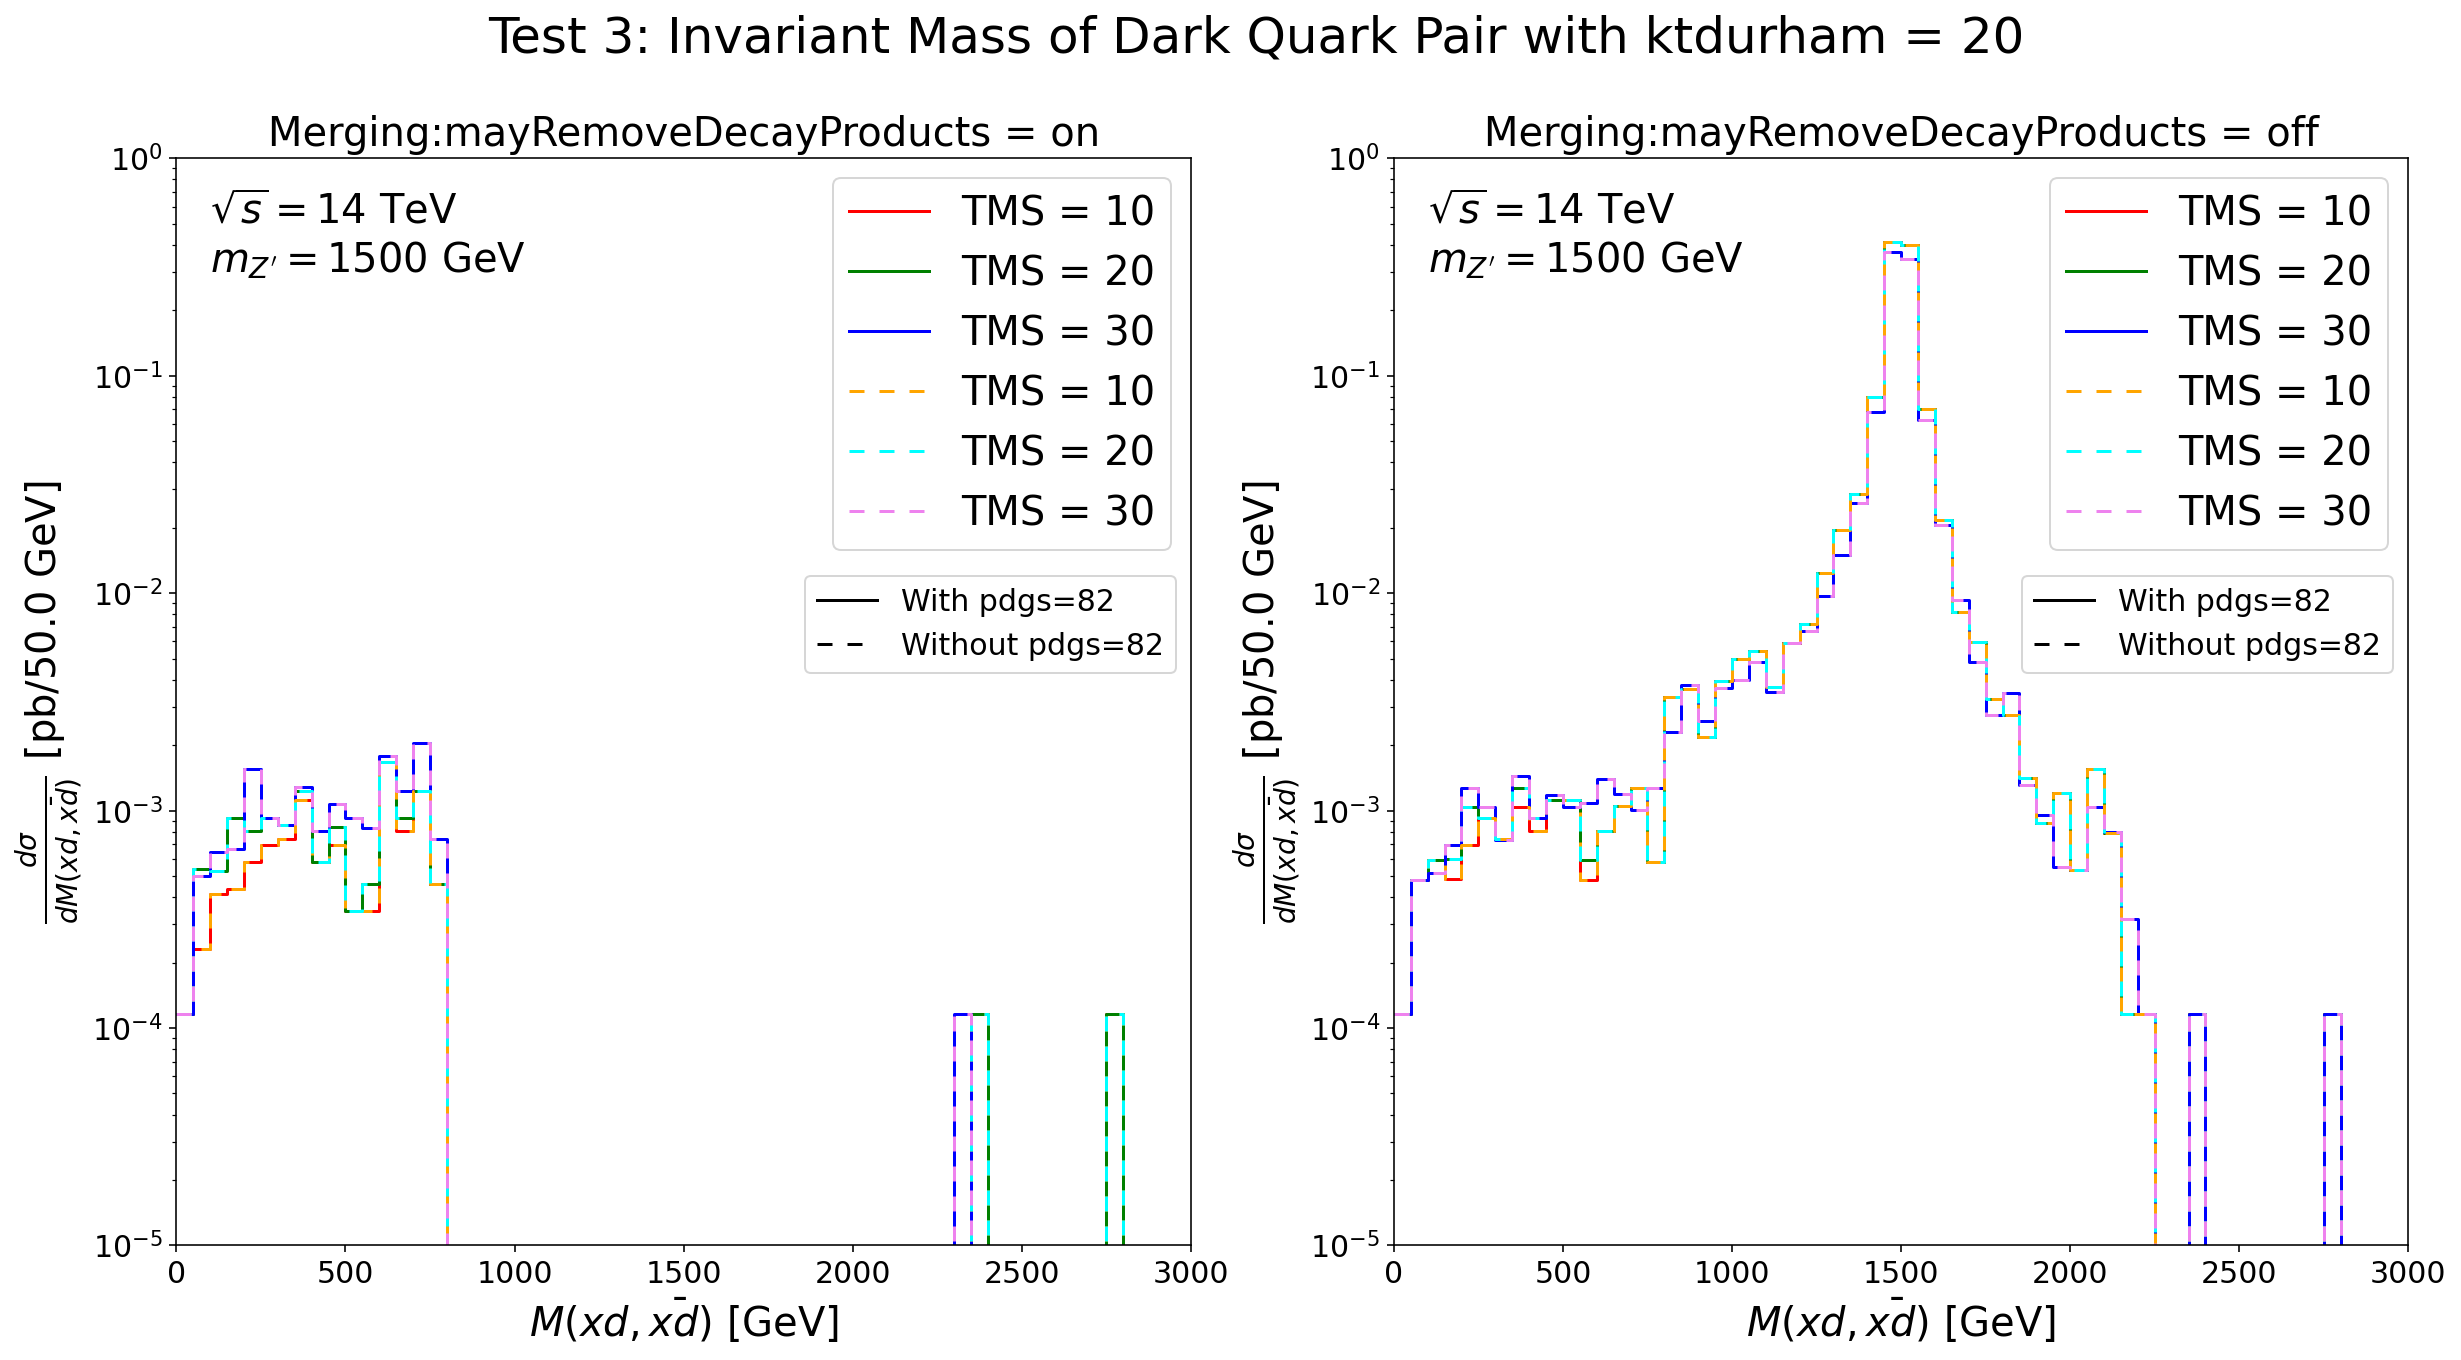

In [13]:
# 1. Figure
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(M_xdxdx_23_8_20_10, bins=binning, weights=weight_8_20_10)
hist0_2, bins0_2 = np.histogram(M_xdxdx_23_8_20, bins=binning, weights=weight_8_20)
hist0_3, bins0_3 = np.histogram(M_xdxdx_23_8_20_30, bins=binning, weights=weight_8_20_30)
hist0_4, bins0_4 = np.histogram(M_xdxdx_23_8_20_10_wo82, bins=binning, weights=weight_8_20_10_wo82)
hist0_5, bins0_5 = np.histogram(M_xdxdx_23_8_20_wo82, bins=binning, weights=weight_8_20_wo82)
hist0_6, bins0_6 = np.histogram(M_xdxdx_23_8_20_30_wo82, bins=binning, weights=weight_8_20_30_wo82)

hist1_1, bins1_1 = np.histogram(M_xdxdx_23_4_20_10, bins=binning, weights=weight_4_20_10)
hist1_2, bins1_2 = np.histogram(M_xdxdx_23_4_20, bins=binning, weights=weight_4_20)
hist1_3, bins1_3 = np.histogram(M_xdxdx_23_4_20_30, bins=binning, weights=weight_4_20_30)
hist1_4, bins1_4 = np.histogram(M_xdxdx_23_4_20_10_wo82, bins=binning, weights=weight_4_20_10_wo82)
hist1_5, bins1_5 = np.histogram(M_xdxdx_23_4_20_wo82, bins=binning, weights=weight_4_20_wo82)
hist1_6, bins1_6 = np.histogram(M_xdxdx_23_4_20_30_wo82, bins=binning, weights=weight_4_20_30_wo82)

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 20")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 30")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 20")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 30")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig.suptitle("Test 3: Invariant Mass of Dark Quark Pair with ktdurham = 20", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(xd,\\bar{xd})}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig1-1_DQP_mRDP_on_off_Mxdxdx_ktdurham20.pdf")
plt.show()

In [14]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 10, Cross-section = 0.010806542360725264 pb
TMS = 20, Cross-section = 0.012788425659692078 pb
TMS = 30, Cross-section = 0.01610906412874858 pb
Merging:mayRemoveDecayProducts = off:
TMS = 10, Cross-section = 1.1249888673145059 pb
TMS = 20, Cross-section = 1.1259142258591786 pb
TMS = 30, Cross-section = 0.9947655271398894 pb


In [15]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, {}".format(np.sum(M_xdxdx_23_8_20_10_wo82 - M_xdxdx_23_8_20_10)))
print("TMS = 20, {}".format(np.sum(M_xdxdx_23_8_20_wo82 - M_xdxdx_23_8_20)))
print("TMS = 30, {}".format(np.sum(M_xdxdx_23_8_20_30_wo82 - M_xdxdx_23_8_20_30)))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, {}".format(np.sum(M_xdxdx_23_4_20_10_wo82 - M_xdxdx_23_4_20_10)))
print("TMS = 20, {}".format(np.sum(M_xdxdx_23_4_20_wo82 - M_xdxdx_23_4_20)))
print("TMS = 30, {}".format(np.sum(M_xdxdx_23_4_20_30_wo82 - M_xdxdx_23_4_20_30)))

Merging:mayRemoveDecayProducts = on:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0


#### 2. $M(xd,\bar{xd})$ for mRDP = on/off with ktdurham = 50

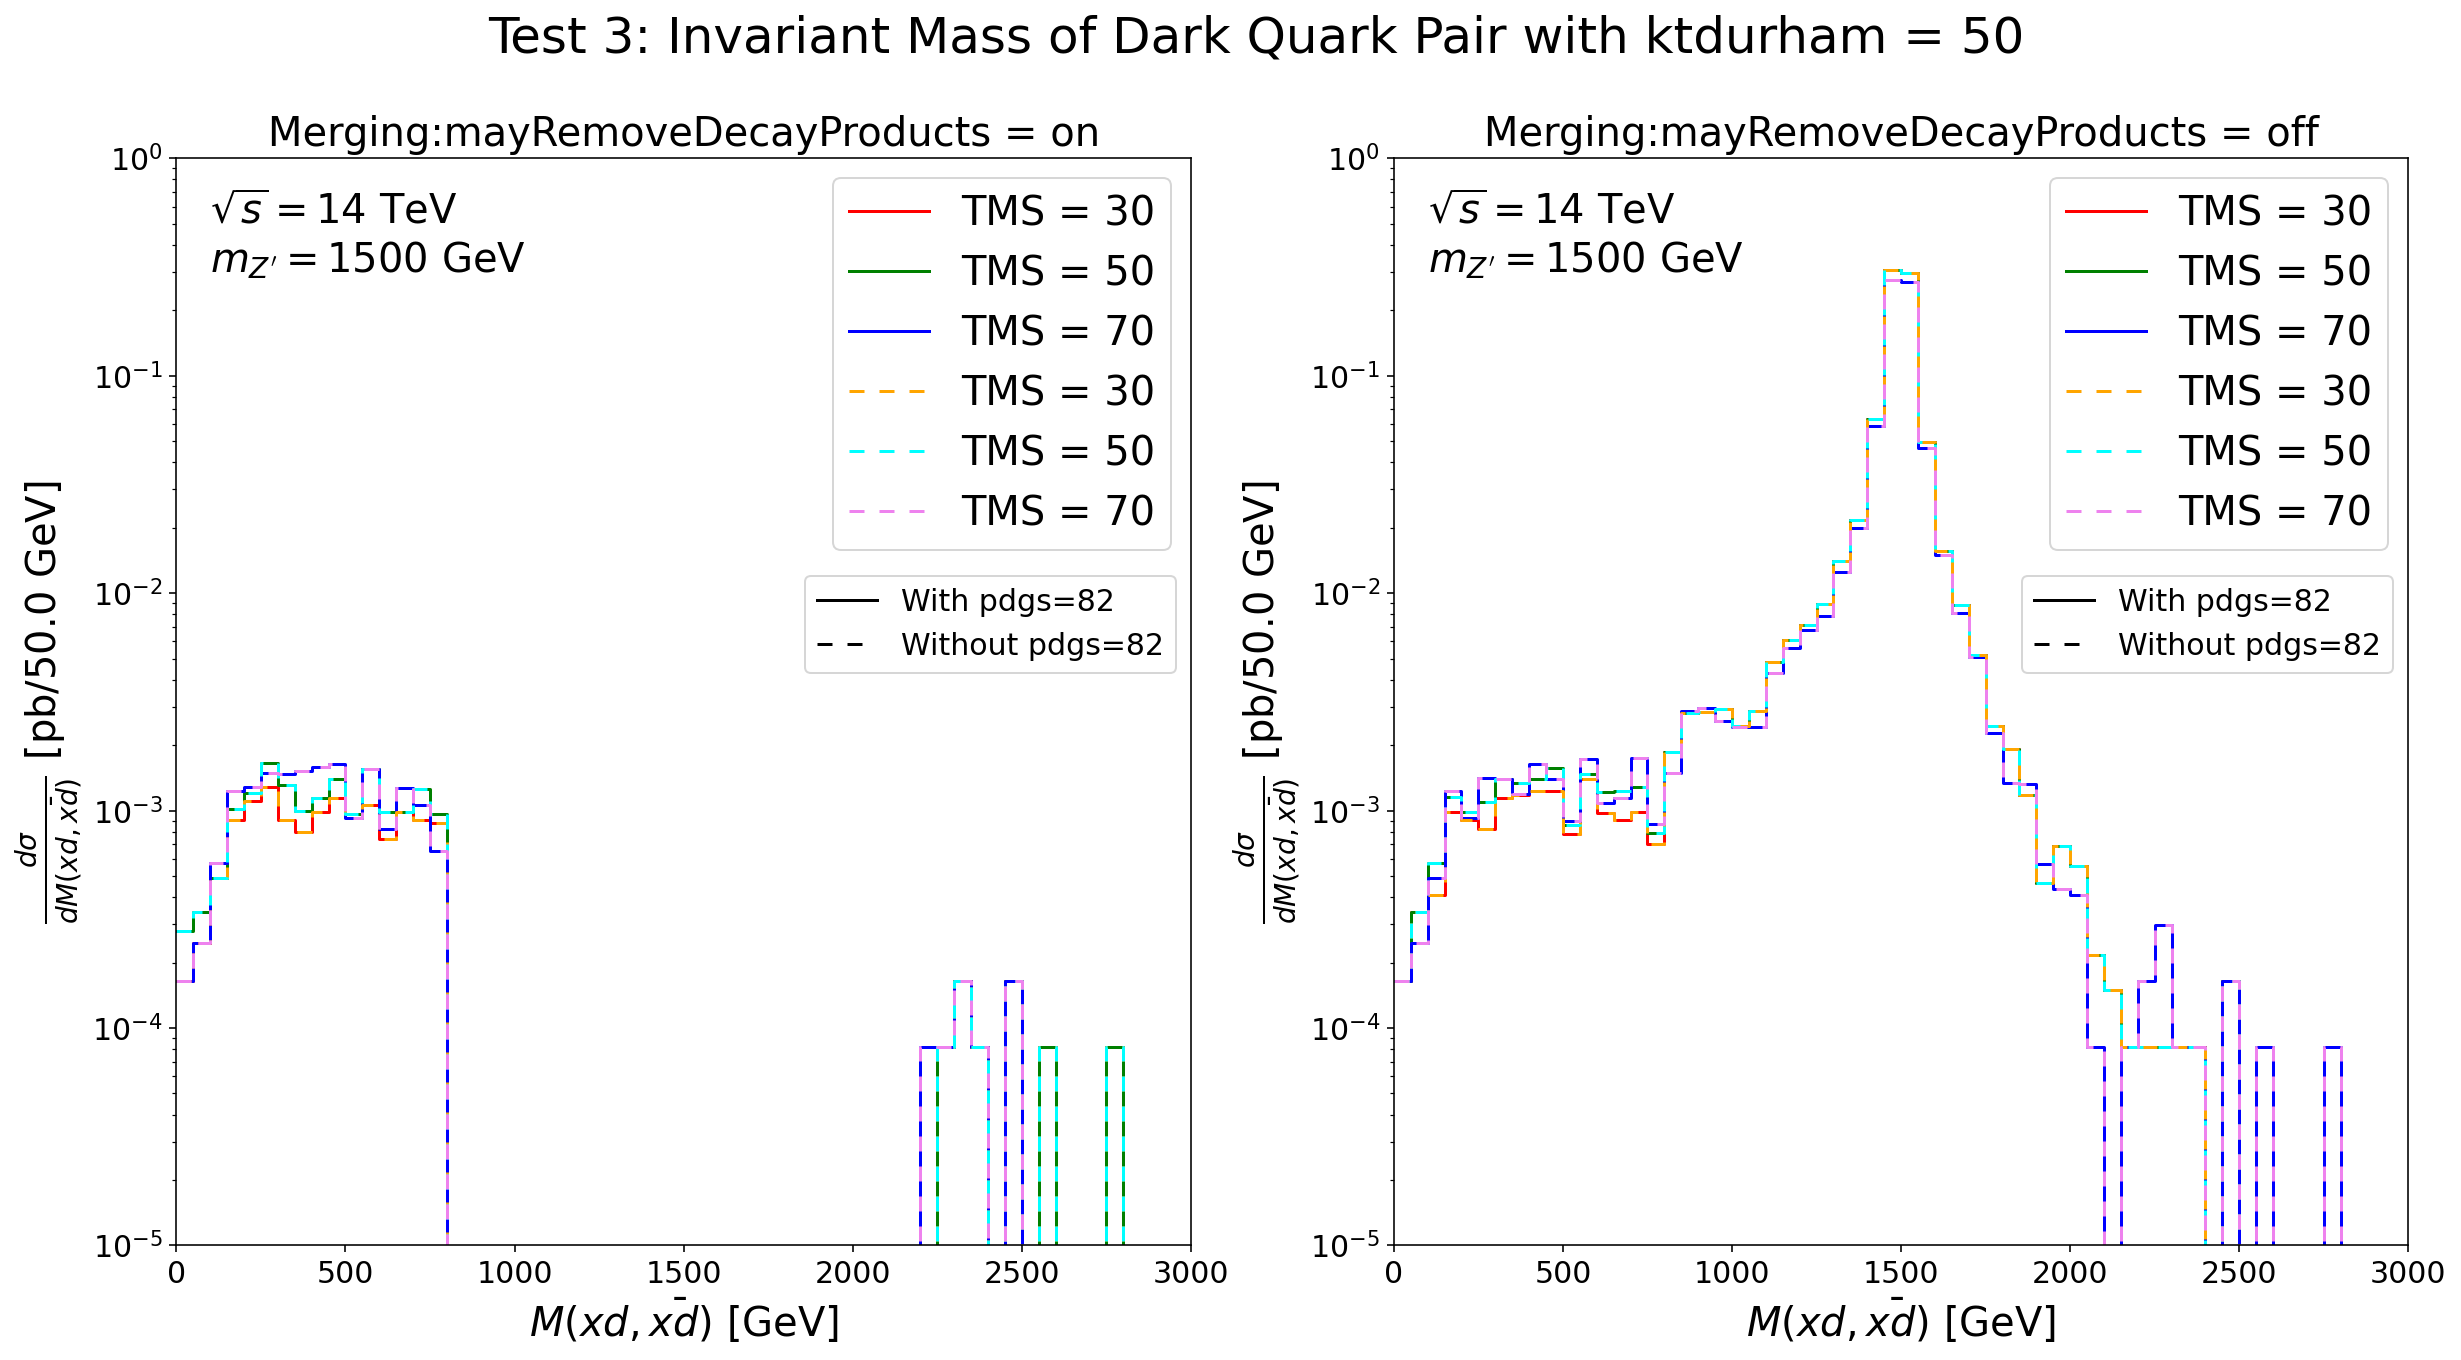

In [16]:
# 1. Figure
fig1_2, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(M_xdxdx_23_8_50_30, bins=binning, weights=weight_8_50_30)
hist0_2, bins0_2 = np.histogram(M_xdxdx_23_8_50, bins=binning, weights=weight_8_50)
hist0_3, bins0_3 = np.histogram(M_xdxdx_23_8_50_70, bins=binning, weights=weight_8_50_70)
hist0_4, bins0_4 = np.histogram(M_xdxdx_23_8_50_30_wo82, bins=binning, weights=weight_8_50_30_wo82)
hist0_5, bins0_5 = np.histogram(M_xdxdx_23_8_50_wo82, bins=binning, weights=weight_8_50_wo82)
hist0_6, bins0_6 = np.histogram(M_xdxdx_23_8_50_70_wo82, bins=binning, weights=weight_8_50_70_wo82)

hist1_1, bins1_1 = np.histogram(M_xdxdx_23_4_50_30, bins=binning, weights=weight_4_50_30)
hist1_2, bins1_2 = np.histogram(M_xdxdx_23_4_50, bins=binning, weights=weight_4_50)
hist1_3, bins1_3 = np.histogram(M_xdxdx_23_4_50_70, bins=binning, weights=weight_4_50_70)
hist1_4, bins1_4 = np.histogram(M_xdxdx_23_4_50_30_wo82, bins=binning, weights=weight_4_50_30_wo82)
hist1_5, bins1_5 = np.histogram(M_xdxdx_23_4_50_wo82, bins=binning, weights=weight_4_50_wo82)
hist1_6, bins1_6 = np.histogram(M_xdxdx_23_4_50_70_wo82, bins=binning, weights=weight_4_50_70_wo82)

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 30")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 50")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 70")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 30")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 50")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 70")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig1_2.suptitle("Test 3: Invariant Mass of Dark Quark Pair with ktdurham = 50", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(xd,\\bar{xd})}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig1-2_DQP_mRDP_on_off_Mxdxdx_ktdurham50.pdf")
plt.show()

In [17]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 30, Cross-section = 0.014211346658385242 pb
TMS = 50, Cross-section = 0.017210953121666803 pb
TMS = 70, Cross-section = 0.018052217124028998 pb
Merging:mayRemoveDecayProducts = off:
TMS = 30, Cross-section = 0.8462222933081689 pb
TMS = 50, Cross-section = 0.8489344991817409 pb
TMS = 70, Cross-section = 0.7749827229536992 pb


In [18]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, {}".format(np.sum(M_xdxdx_23_8_50_30_wo82 - M_xdxdx_23_8_50_30)))
print("TMS = 50, {}".format(np.sum(M_xdxdx_23_8_50_wo82 - M_xdxdx_23_8_50)))
print("TMS = 70, {}".format(np.sum(M_xdxdx_23_8_50_70_wo82 - M_xdxdx_23_8_50_70)))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, {}".format(np.sum(M_xdxdx_23_4_50_30_wo82 - M_xdxdx_23_4_50_30)))
print("TMS = 50, {}".format(np.sum(M_xdxdx_23_4_50_wo82 - M_xdxdx_23_4_50)))
print("TMS = 70, {}".format(np.sum(M_xdxdx_23_4_50_70_wo82 - M_xdxdx_23_4_50_70)))

Merging:mayRemoveDecayProducts = on:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0


#### Conclusion: The results of with and without pdgs=82 are the same for ktdurham = 20 & 50.

### 3-2. Jet in the truth level

#### 1. Leading jet $p_T$ for mRDP = on/off with ktdurham = 20

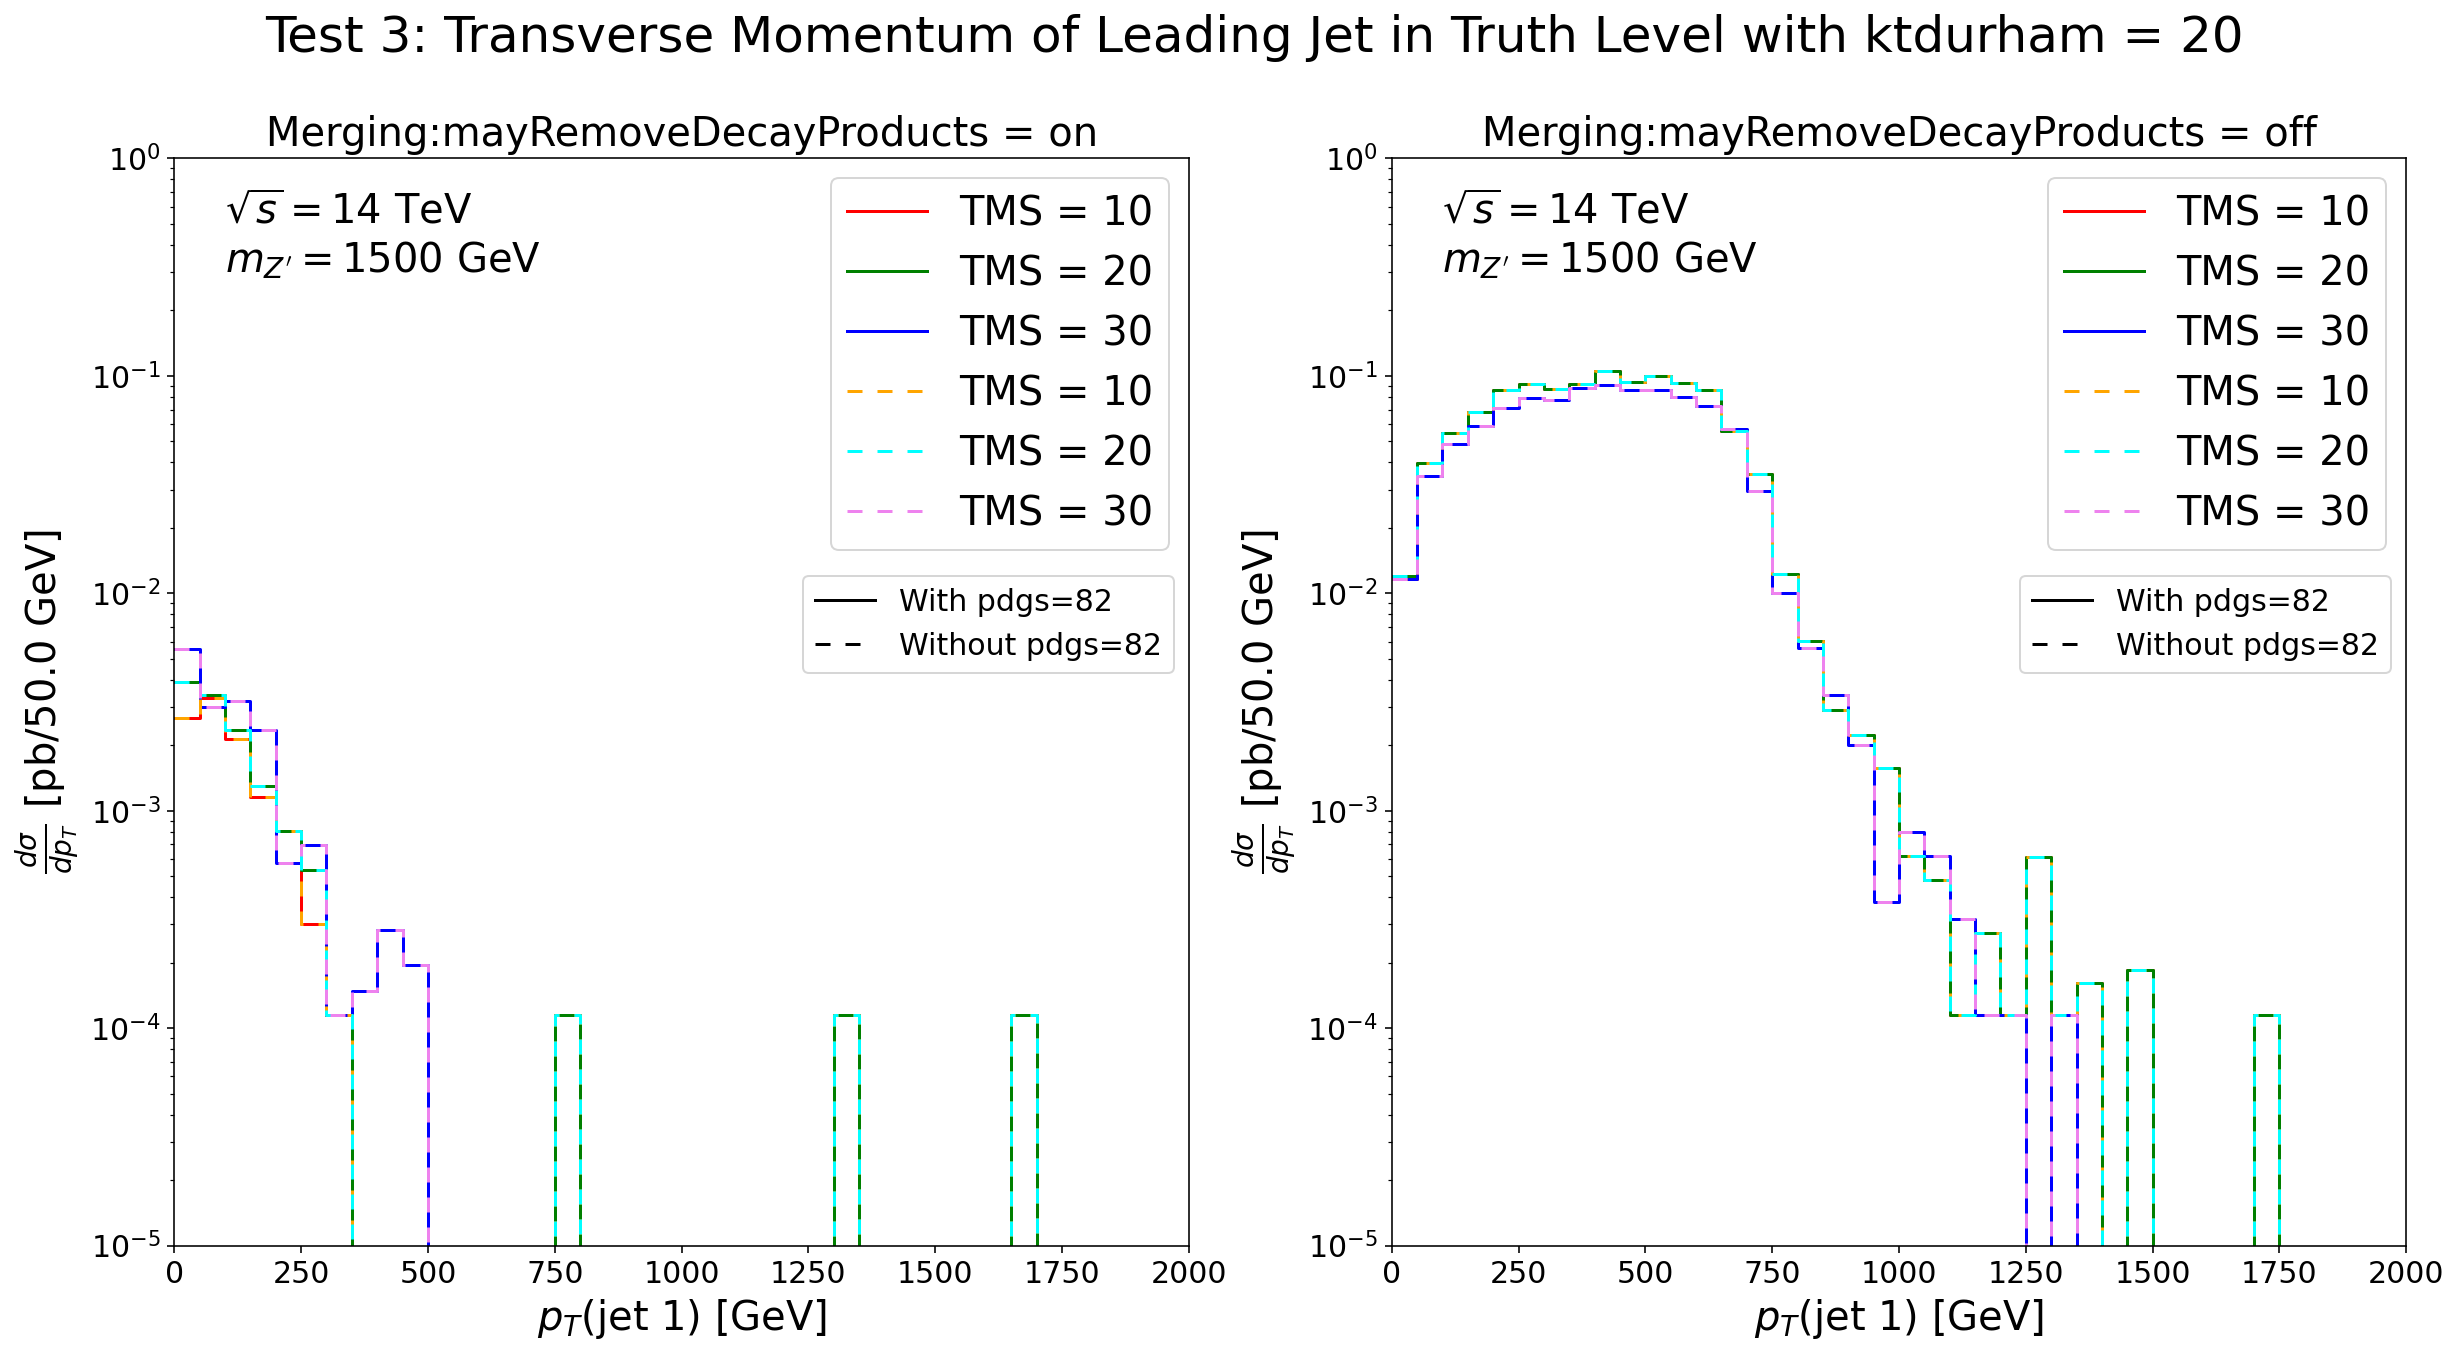

In [19]:
# 1. Figure
fig2_1, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_8_20_10[4], bins=binning, weights=weight_8_20_10[s_t_j_fDM_8_20_10])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_8_20[4], bins=binning, weights=weight_8_20[s_t_j_fDM_8_20])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_8_20_30[4], bins=binning, weights=weight_8_20_30[s_t_j_fDM_8_20_30])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_8_20_10_wo82[4], bins=binning, weights=weight_8_20_10_wo82[s_t_j_fDM_8_20_10_wo82])
hist0_5, bins0_5 = np.histogram(truth_jet_filterDM_8_20_wo82[4], bins=binning, weights=weight_8_20_wo82[s_t_j_fDM_8_20_wo82])
hist0_6, bins0_6 = np.histogram(truth_jet_filterDM_8_20_30_wo82[4], bins=binning, weights=weight_8_20_30_wo82[s_t_j_fDM_8_20_30_wo82])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_4_20_10[4], bins=binning, weights=weight_4_20_10[s_t_j_fDM_4_20_10])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4_20[4], bins=binning, weights=weight_4_20[s_t_j_fDM_4_20])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_4_20_30[4], bins=binning, weights=weight_4_20_30[s_t_j_fDM_4_20_30])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4_20_10_wo82[4], bins=binning, weights=weight_4_20_10_wo82[s_t_j_fDM_4_20_10_wo82])
hist1_5, bins1_5 = np.histogram(truth_jet_filterDM_4_20_wo82[4], bins=binning, weights=weight_4_20_wo82[s_t_j_fDM_4_20_wo82])
hist1_6, bins1_6 = np.histogram(truth_jet_filterDM_4_20_30_wo82[4], bins=binning, weights=weight_4_20_30_wo82[s_t_j_fDM_4_20_30_wo82])

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 20")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 30")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 20")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 30")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig2_1.suptitle("Test 3: Transverse Momentum of Leading Jet in Truth Level with ktdurham = 20", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dp_T}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 2000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 2000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig2-1_jT_mRDP_on_off_pT_ktdurham20.pdf")
plt.show()

In [20]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 10, Cross-section = 0.010806542360725264 pb
TMS = 20, Cross-section = 0.012788425659692078 pb
TMS = 30, Cross-section = 0.01610906412874858 pb
Merging:mayRemoveDecayProducts = off:
TMS = 10, Cross-section = 1.1249888673145014 pb
TMS = 20, Cross-section = 1.1259142258591746 pb
TMS = 30, Cross-section = 0.9947655271398845 pb


In [21]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, {}".format(np.sum(truth_jet_filterDM_8_20_10[4] - truth_jet_filterDM_8_20_10_wo82[4])))
print("TMS = 20, {}".format(np.sum(truth_jet_filterDM_8_20[4] - truth_jet_filterDM_8_20_wo82[4])))
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_8_20_30[4] - truth_jet_filterDM_8_20_30_wo82[4])))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, {}".format(np.sum(truth_jet_filterDM_4_20_10[4] - truth_jet_filterDM_4_20_10_wo82[4])))
print("TMS = 20, {}".format(np.sum(truth_jet_filterDM_4_20[4] - truth_jet_filterDM_4_20_wo82[4])))
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_4_20_30[4] - truth_jet_filterDM_4_20_30_wo82[4])))

Merging:mayRemoveDecayProducts = on:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0


#### 2. Leading jet $p_T$ for mRDP = on/off with ktdurham = 50

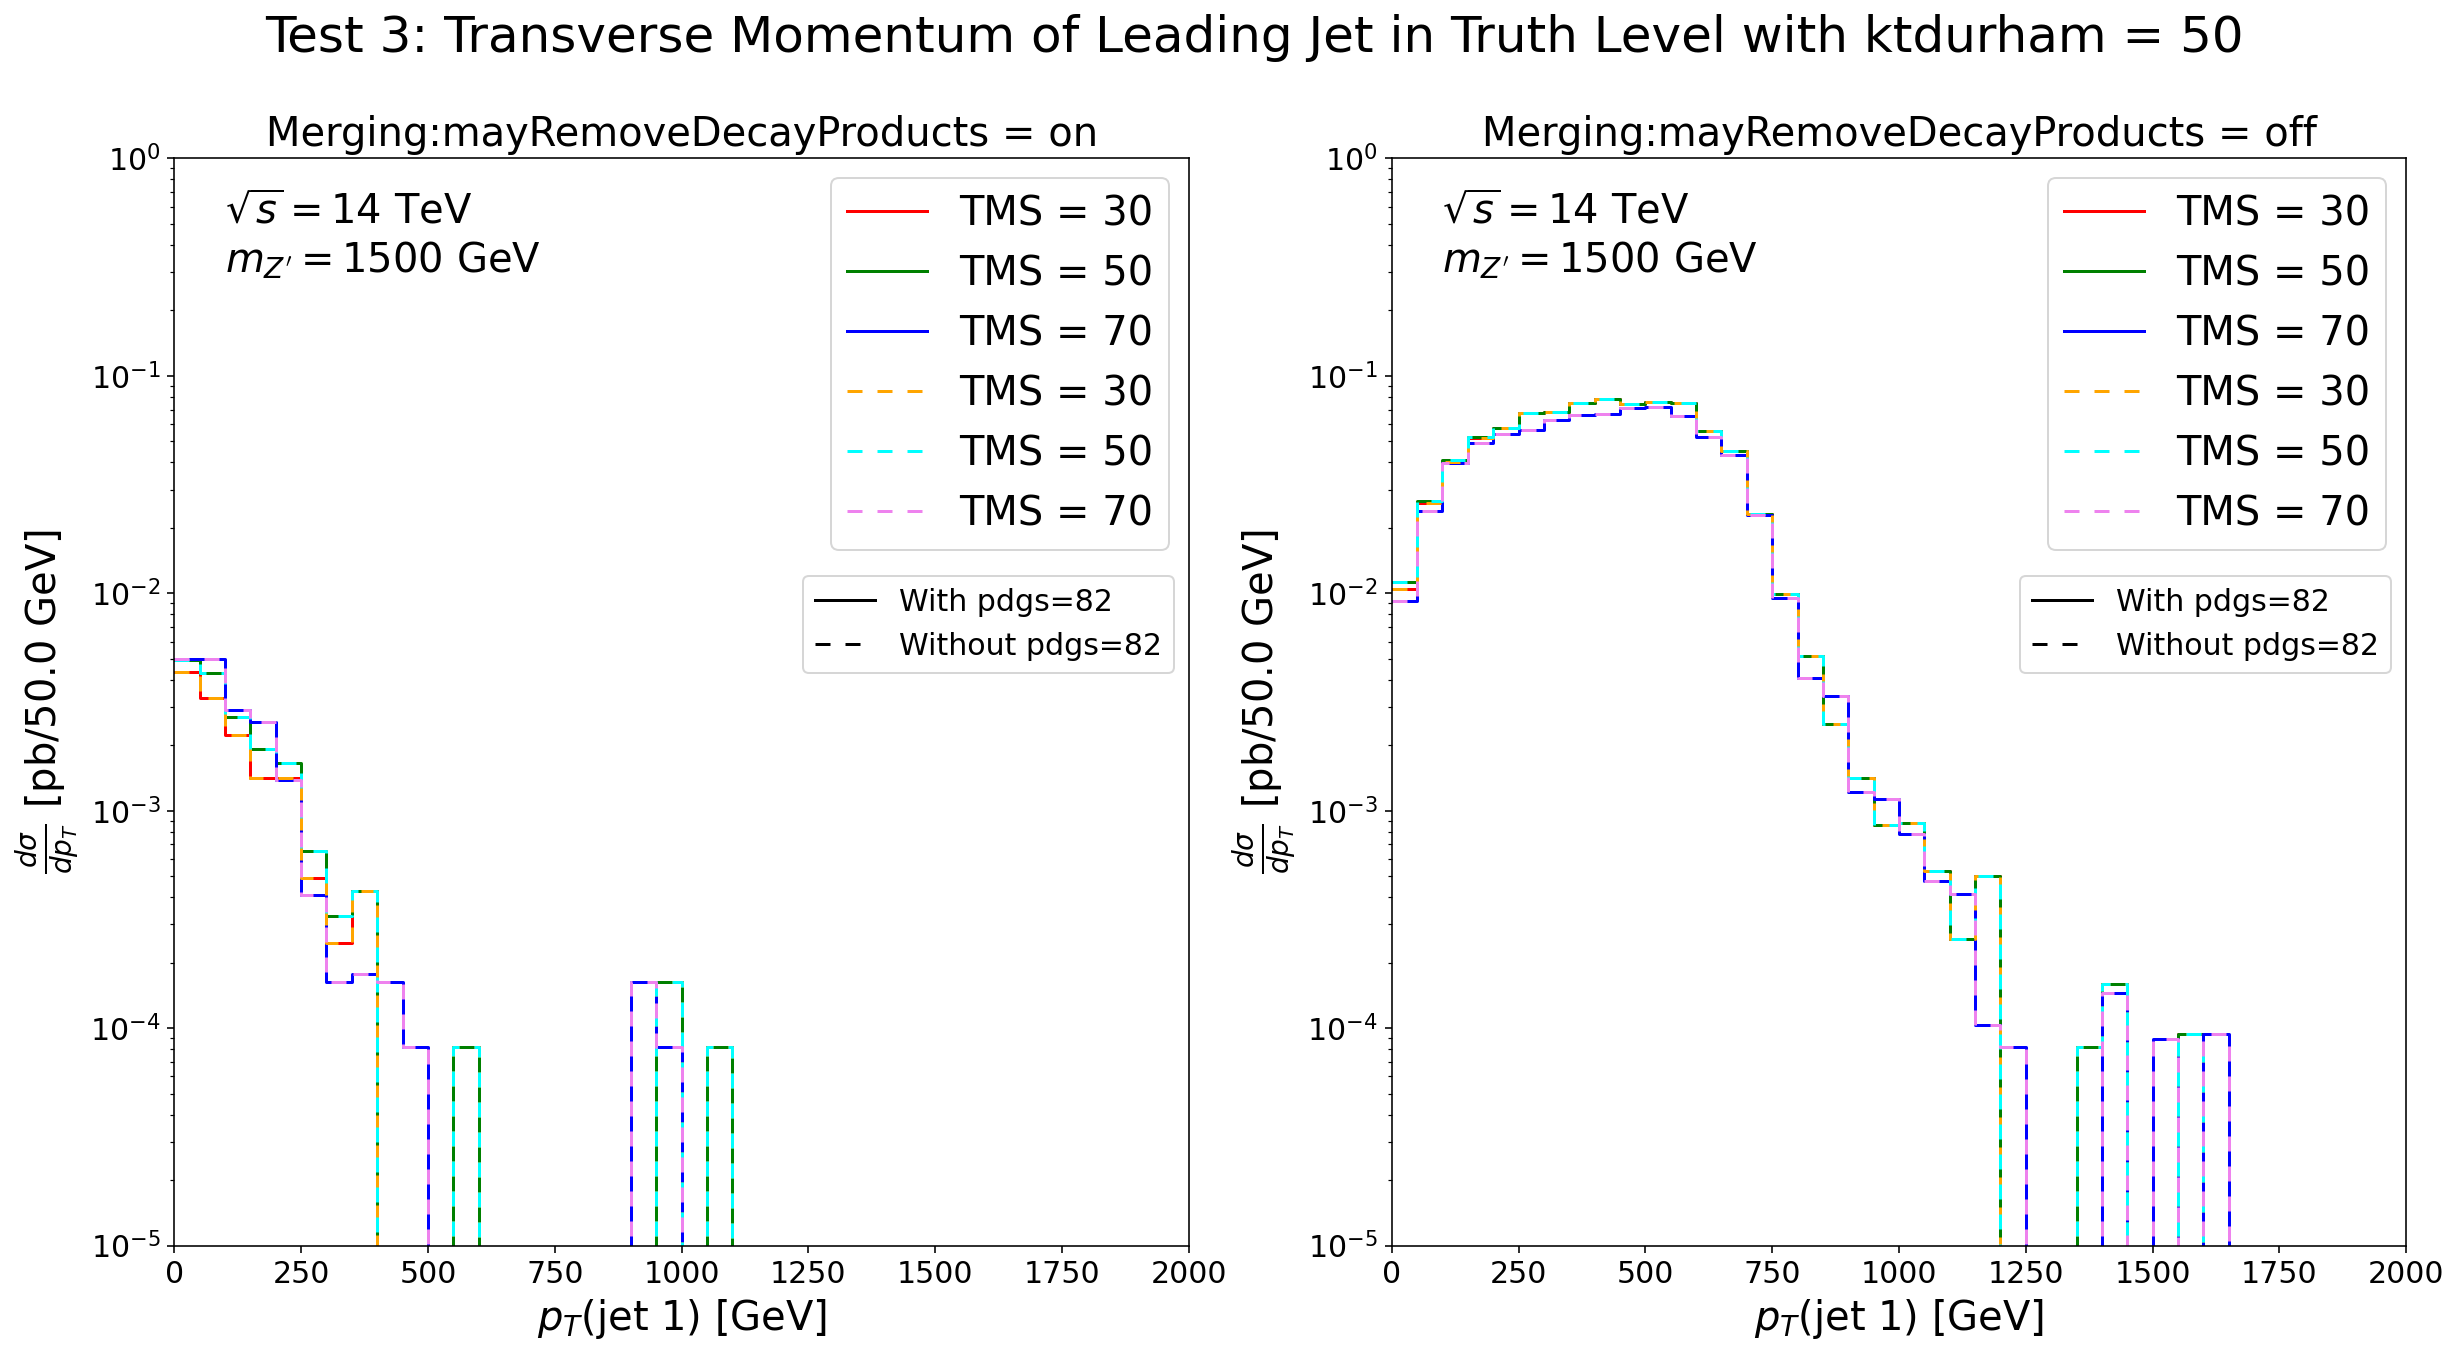

In [22]:
# 1. Figure
fig2_2, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_8_50_30[4], bins=binning, weights=weight_8_50_30[s_t_j_fDM_8_50_30])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_8_50[4], bins=binning, weights=weight_8_50[s_t_j_fDM_8_50])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_8_50_70[4], bins=binning, weights=weight_8_50_70[s_t_j_fDM_8_50_70])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_8_50_30_wo82[4], bins=binning, weights=weight_8_50_30_wo82[s_t_j_fDM_8_50_30_wo82])
hist0_5, bins0_5 = np.histogram(truth_jet_filterDM_8_50_wo82[4], bins=binning, weights=weight_8_50_wo82[s_t_j_fDM_8_50_wo82])
hist0_6, bins0_6 = np.histogram(truth_jet_filterDM_8_50_70_wo82[4], bins=binning, weights=weight_8_50_70_wo82[s_t_j_fDM_8_50_70_wo82])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_4_50_30[4], bins=binning, weights=weight_4_50_30[s_t_j_fDM_4_50_30])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4_50[4], bins=binning, weights=weight_4_50[s_t_j_fDM_4_50])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_4_50_70[4], bins=binning, weights=weight_4_50_70[s_t_j_fDM_4_50_70])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4_50_30_wo82[4], bins=binning, weights=weight_4_50_30_wo82[s_t_j_fDM_4_50_30_wo82])
hist1_5, bins1_5 = np.histogram(truth_jet_filterDM_4_50_wo82[4], bins=binning, weights=weight_4_50_wo82[s_t_j_fDM_4_50_wo82])
hist1_6, bins1_6 = np.histogram(truth_jet_filterDM_4_50_70_wo82[4], bins=binning, weights=weight_4_50_70_wo82[s_t_j_fDM_4_50_70_wo82])

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 30")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 50")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 70")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 30")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 50")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 70")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig2_2.suptitle("Test 3: Transverse Momentum of Leading Jet in Truth Level with ktdurham = 50", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dp_T}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 2000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 2000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig2-2_jT_mRDP_on_off_pT_ktdurham50.pdf")
plt.show()

In [23]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 30, Cross-section = 0.014211346658385242 pb
TMS = 50, Cross-section = 0.017210953121666803 pb
TMS = 70, Cross-section = 0.018052217124028998 pb
Merging:mayRemoveDecayProducts = off:
TMS = 30, Cross-section = 0.8462222933081713 pb
TMS = 50, Cross-section = 0.8489344991817431 pb
TMS = 70, Cross-section = 0.7749827229537019 pb


In [24]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_8_50_30[4] - truth_jet_filterDM_8_50_30_wo82[4])))
print("TMS = 50, {}".format(np.sum(truth_jet_filterDM_8_50[4] - truth_jet_filterDM_8_50_wo82[4])))
print("TMS = 70, {}".format(np.sum(truth_jet_filterDM_8_50_70[4] - truth_jet_filterDM_8_50_70_wo82[4])))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_4_50_30[4] - truth_jet_filterDM_4_50_30_wo82[4])))
print("TMS = 50, {}".format(np.sum(truth_jet_filterDM_4_50[4] - truth_jet_filterDM_4_50_wo82[4])))
print("TMS = 70, {}".format(np.sum(truth_jet_filterDM_4_50_70[4] - truth_jet_filterDM_4_50_70_wo82[4])))

Merging:mayRemoveDecayProducts = on:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0


#### Conclusion: The results of with and without pdgs=82 are the same for ktdurham = 20 & 50.

#### 3. $M(jj)$ for mRDP = on/off with ktdurham = 20

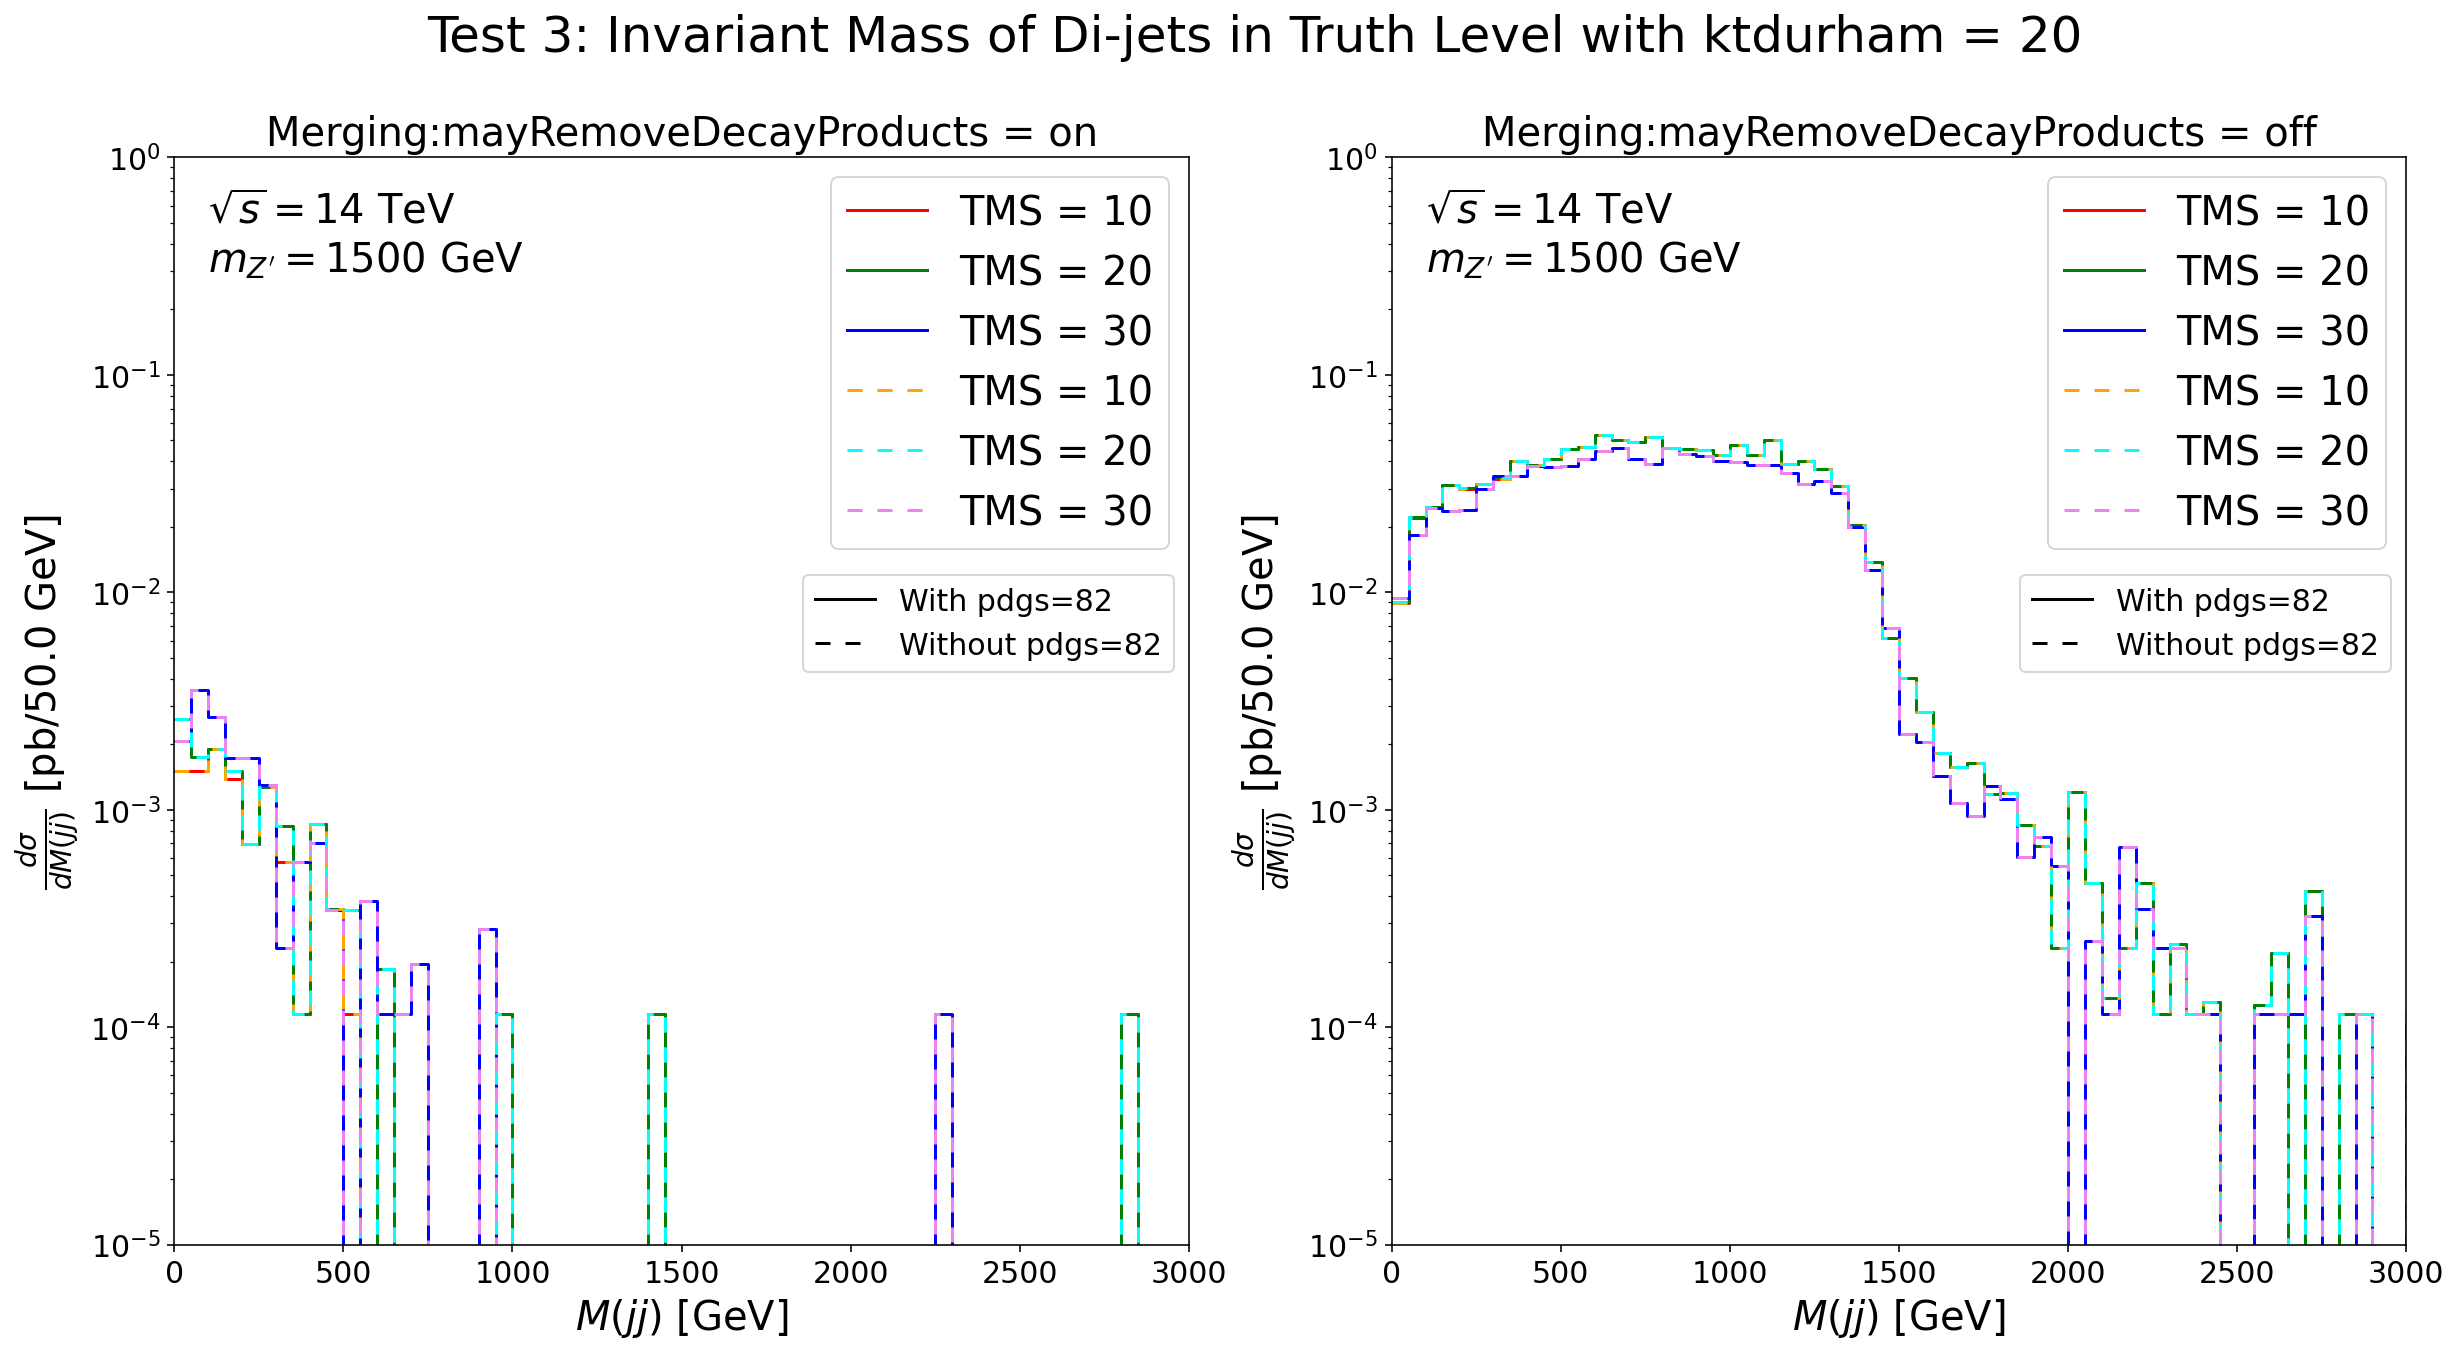

In [25]:
# 1. Figure
fig2_3, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_8_20_10[0], bins=binning, weights=weight_8_20_10[s_t_j_fDM_8_20_10])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_8_20[0], bins=binning, weights=weight_8_20[s_t_j_fDM_8_20])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_8_20_30[0], bins=binning, weights=weight_8_20_30[s_t_j_fDM_8_20_30])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_8_20_10_wo82[0], bins=binning, weights=weight_8_20_10_wo82[s_t_j_fDM_8_20_10_wo82])
hist0_5, bins0_5 = np.histogram(truth_jet_filterDM_8_20_wo82[0], bins=binning, weights=weight_8_20_wo82[s_t_j_fDM_8_20_wo82])
hist0_6, bins0_6 = np.histogram(truth_jet_filterDM_8_20_30_wo82[0], bins=binning, weights=weight_8_20_30_wo82[s_t_j_fDM_8_20_30_wo82])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_4_20_10[0], bins=binning, weights=weight_4_20_10[s_t_j_fDM_4_20_10])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4_20[0], bins=binning, weights=weight_4_20[s_t_j_fDM_4_20])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_4_20_30[0], bins=binning, weights=weight_4_20_30[s_t_j_fDM_4_20_30])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4_20_10_wo82[0], bins=binning, weights=weight_4_20_10_wo82[s_t_j_fDM_4_20_10_wo82])
hist1_5, bins1_5 = np.histogram(truth_jet_filterDM_4_20_wo82[0], bins=binning, weights=weight_4_20_wo82[s_t_j_fDM_4_20_wo82])
hist1_6, bins1_6 = np.histogram(truth_jet_filterDM_4_20_30_wo82[0], bins=binning, weights=weight_4_20_30_wo82[s_t_j_fDM_4_20_30_wo82])

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 20")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 30")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 20")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 30")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig2_3.suptitle("Test 3: Invariant Mass of Di-jets in Truth Level with ktdurham = 20", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(jj)}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig2-3_jT_mRDP_on_off_Mjj_ktdurham20.pdf")
plt.show()

In [26]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 10, Cross-section = 0.010806542360725264 pb
TMS = 20, Cross-section = 0.012788425659692078 pb
TMS = 30, Cross-section = 0.01610906412874858 pb
Merging:mayRemoveDecayProducts = off:
TMS = 10, Cross-section = 1.1249888673145079 pb
TMS = 20, Cross-section = 1.1259142258591806 pb
TMS = 30, Cross-section = 0.9947655271398912 pb


In [27]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, {}".format(np.sum(truth_jet_filterDM_8_20_10[0] - truth_jet_filterDM_8_20_10_wo82[0])))
print("TMS = 20, {}".format(np.sum(truth_jet_filterDM_8_20[0] - truth_jet_filterDM_8_20_wo82[0])))
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_8_20_30[0] - truth_jet_filterDM_8_20_30_wo82[0])))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, {}".format(np.sum(truth_jet_filterDM_4_20_10[0] - truth_jet_filterDM_4_20_10_wo82[0])))
print("TMS = 20, {}".format(np.sum(truth_jet_filterDM_4_20[0] - truth_jet_filterDM_4_20_wo82[0])))
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_4_20_30[0] - truth_jet_filterDM_4_20_30_wo82[0])))

Merging:mayRemoveDecayProducts = on:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0


#### 4. $M(jj)$ for mRDP = on/off with ktdurham = 50

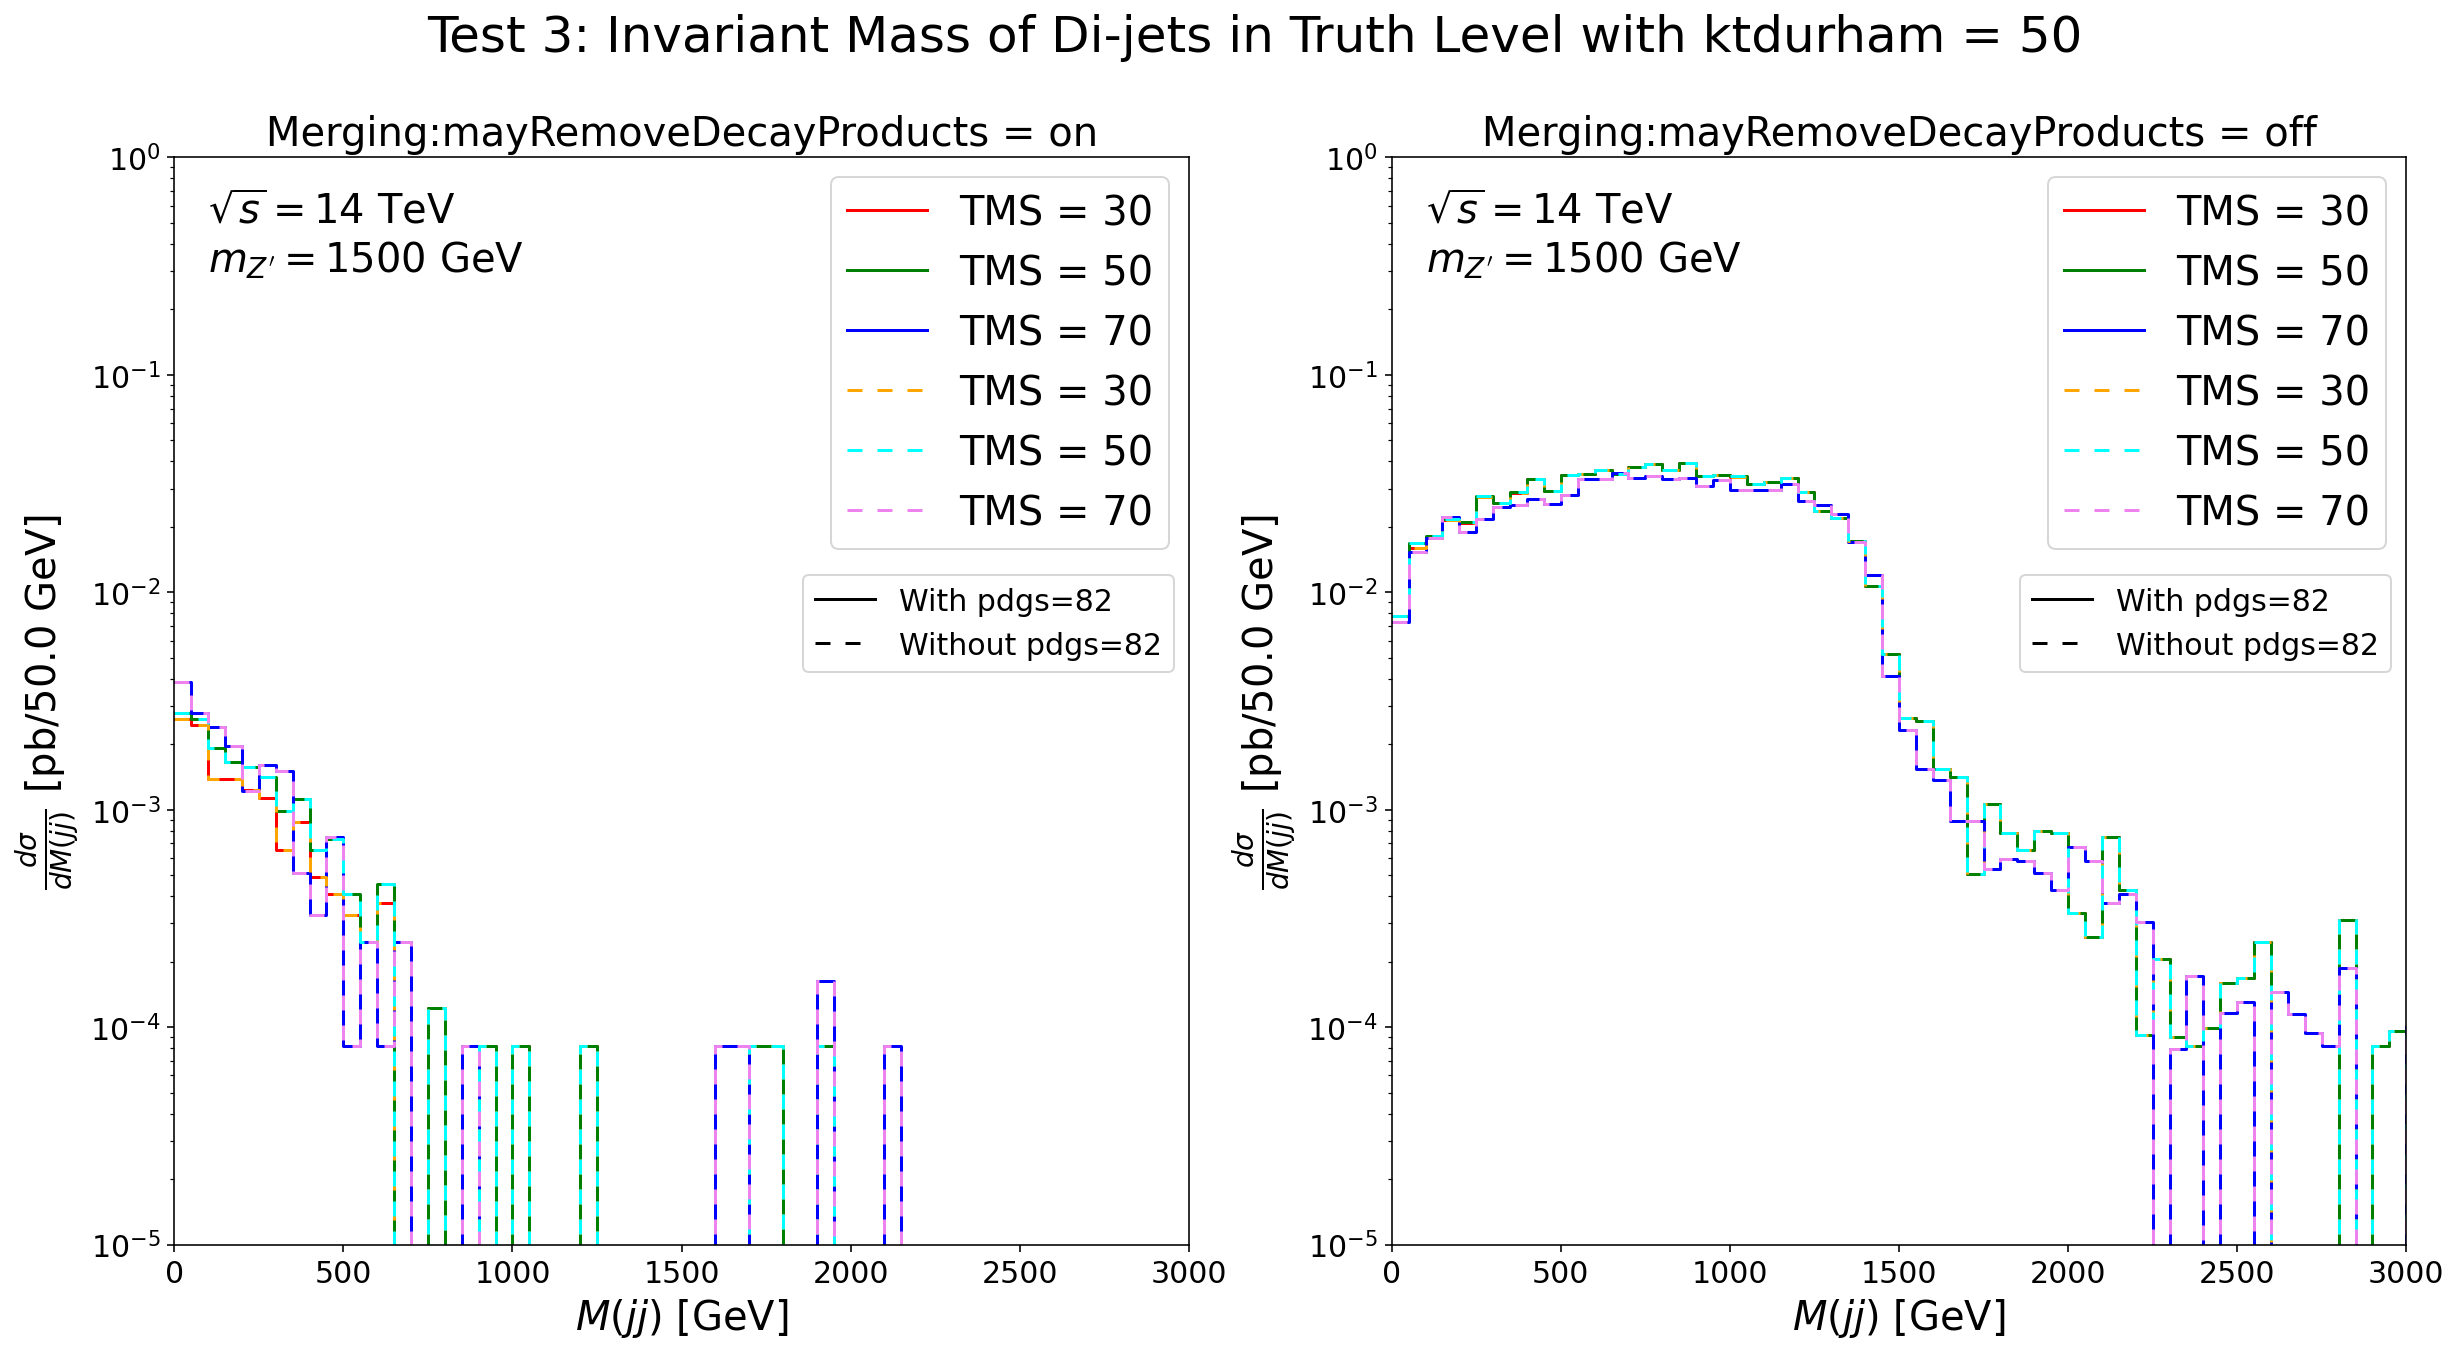

In [28]:
# 1. Figure
fig2_4, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_8_50_30[0], bins=binning, weights=weight_8_50_30[s_t_j_fDM_8_50_30])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_8_50[0], bins=binning, weights=weight_8_50[s_t_j_fDM_8_50])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_8_50_70[0], bins=binning, weights=weight_8_50_70[s_t_j_fDM_8_50_70])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_8_50_30_wo82[0], bins=binning, weights=weight_8_50_30_wo82[s_t_j_fDM_8_50_30_wo82])
hist0_5, bins0_5 = np.histogram(truth_jet_filterDM_8_50_wo82[0], bins=binning, weights=weight_8_50_wo82[s_t_j_fDM_8_50_wo82])
hist0_6, bins0_6 = np.histogram(truth_jet_filterDM_8_50_70_wo82[0], bins=binning, weights=weight_8_50_70_wo82[s_t_j_fDM_8_50_70_wo82])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_4_50_30[0], bins=binning, weights=weight_4_50_30[s_t_j_fDM_4_50_30])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4_50[0], bins=binning, weights=weight_4_50[s_t_j_fDM_4_50])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_4_50_70[0], bins=binning, weights=weight_4_50_70[s_t_j_fDM_4_50_70])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4_50_30_wo82[0], bins=binning, weights=weight_4_50_30_wo82[s_t_j_fDM_4_50_30_wo82])
hist1_5, bins1_5 = np.histogram(truth_jet_filterDM_4_50_wo82[0], bins=binning, weights=weight_4_50_wo82[s_t_j_fDM_4_50_wo82])
hist1_6, bins1_6 = np.histogram(truth_jet_filterDM_4_50_70_wo82[0], bins=binning, weights=weight_4_50_70_wo82[s_t_j_fDM_4_50_70_wo82])

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 30")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 50")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 70")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 30")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 50")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 70")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig2_4.suptitle("Test 3: Invariant Mass of Di-jets in Truth Level with ktdurham = 50", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(jj)}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig2-4_jT_mRDP_on_off_Mjj_ktdurham50.pdf")
plt.show()

In [29]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 30, Cross-section = 0.014211346658385242 pb
TMS = 50, Cross-section = 0.017210953121666803 pb
TMS = 70, Cross-section = 0.018052217124028998 pb
Merging:mayRemoveDecayProducts = off:
TMS = 30, Cross-section = 0.8462222933081721 pb
TMS = 50, Cross-section = 0.8489344991817439 pb
TMS = 70, Cross-section = 0.7749827229537035 pb


In [30]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_8_50_30[0] - truth_jet_filterDM_8_50_30_wo82[0])))
print("TMS = 50, {}".format(np.sum(truth_jet_filterDM_8_50[0] - truth_jet_filterDM_8_50_wo82[0])))
print("TMS = 70, {}".format(np.sum(truth_jet_filterDM_8_50_70[0] - truth_jet_filterDM_8_50_70_wo82[0])))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, {}".format(np.sum(truth_jet_filterDM_4_50_30[0] - truth_jet_filterDM_4_50_30_wo82[0])))
print("TMS = 50, {}".format(np.sum(truth_jet_filterDM_4_50[0] - truth_jet_filterDM_4_50_wo82[0])))
print("TMS = 70, {}".format(np.sum(truth_jet_filterDM_4_50_70[0] - truth_jet_filterDM_4_50_70_wo82[0])))

Merging:mayRemoveDecayProducts = on:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0


#### Conclusion: The results of with and without pdgs=82 are the same for ktdurham = 20 & 50.

#### 5. $MET$ for mRDP = on/off with ktdurham = 20

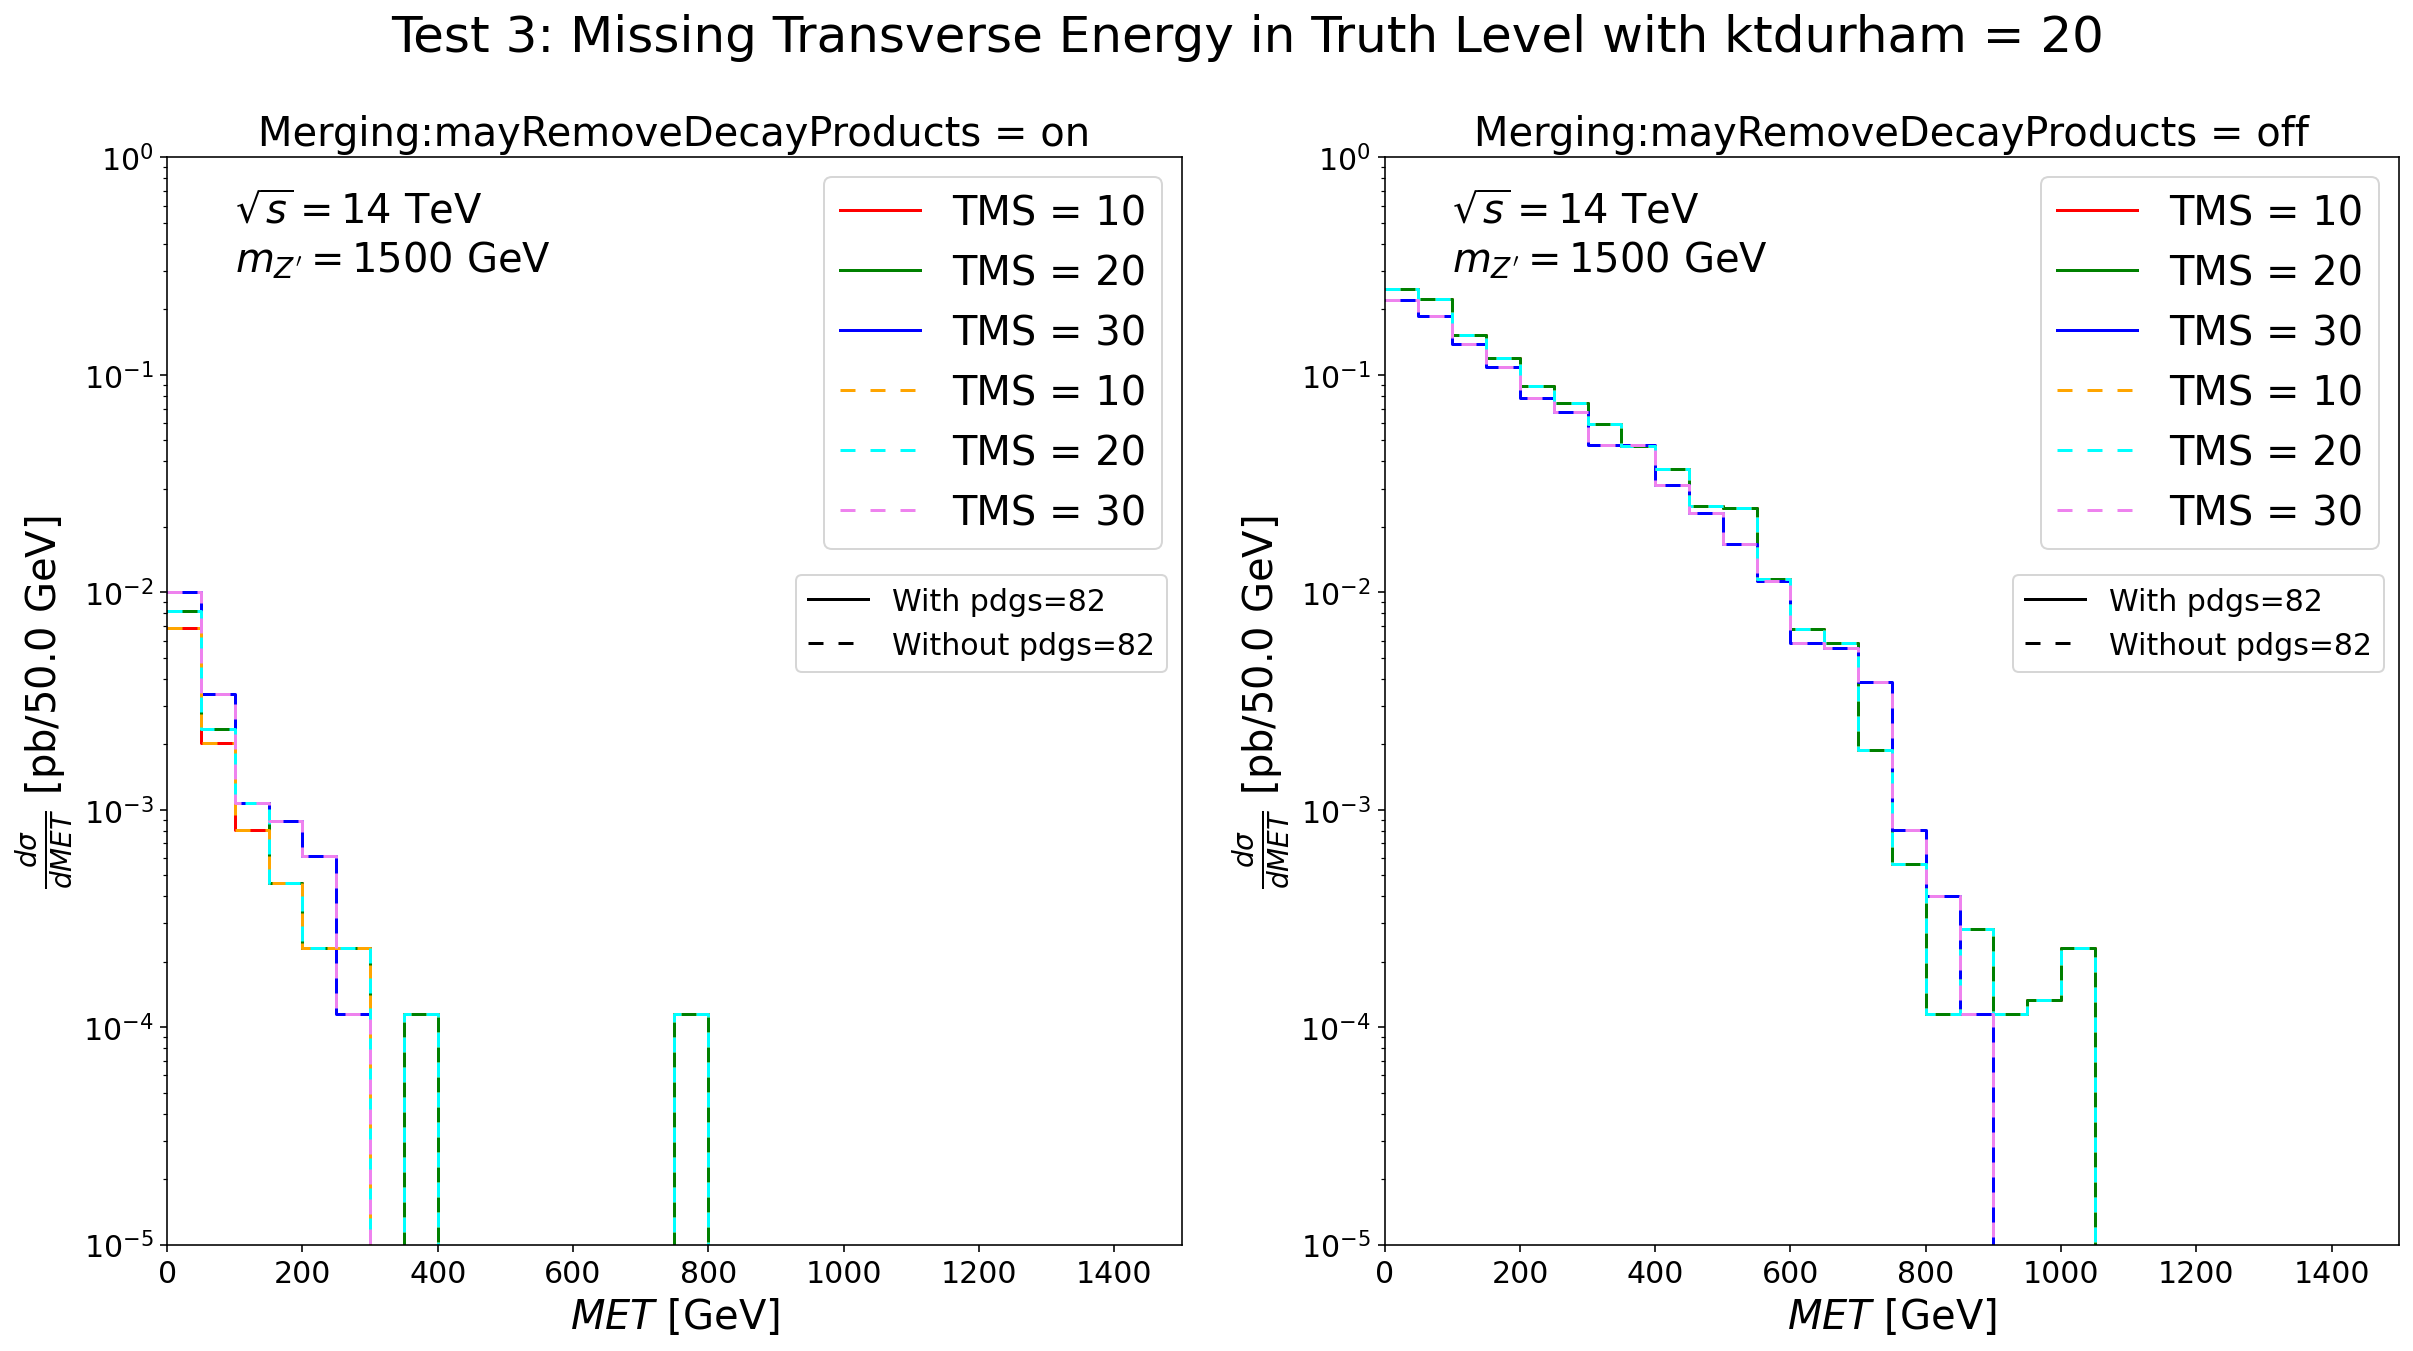

In [31]:
# 1. Figure
fig2_5, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_MET_8_20_10[0], bins=binning, weights=weight_8_20_10[s_t_MET_8_20_10])
hist0_2, bins0_2 = np.histogram(truth_MET_8_20[0], bins=binning, weights=weight_8_20[s_t_MET_8_20])
hist0_3, bins0_3 = np.histogram(truth_MET_8_20_30[0], bins=binning, weights=weight_8_20_30[s_t_MET_8_20_30])
hist0_4, bins0_4 = np.histogram(truth_MET_8_20_10_wo82[0], bins=binning, weights=weight_8_20_10_wo82[s_t_MET_8_20_10_wo82])
hist0_5, bins0_5 = np.histogram(truth_MET_8_20_wo82[0], bins=binning, weights=weight_8_20_wo82[s_t_MET_8_20_wo82])
hist0_6, bins0_6 = np.histogram(truth_MET_8_20_30_wo82[0], bins=binning, weights=weight_8_20_30_wo82[s_t_MET_8_20_30_wo82])

hist1_1, bins1_1 = np.histogram(truth_MET_4_20_10[0], bins=binning, weights=weight_4_20_10[s_t_MET_4_20_10])
hist1_2, bins1_2 = np.histogram(truth_MET_4_20[0], bins=binning, weights=weight_4_20[s_t_MET_4_20])
hist1_3, bins1_3 = np.histogram(truth_MET_4_20_30[0], bins=binning, weights=weight_4_20_30[s_t_MET_4_20_30])
hist1_4, bins1_4 = np.histogram(truth_MET_4_20_10_wo82[0], bins=binning, weights=weight_4_20_10_wo82[s_t_MET_4_20_10_wo82])
hist1_5, bins1_5 = np.histogram(truth_MET_4_20_wo82[0], bins=binning, weights=weight_4_20_wo82[s_t_MET_4_20_wo82])
hist1_6, bins1_6 = np.histogram(truth_MET_4_20_30_wo82[0], bins=binning, weights=weight_4_20_30_wo82[s_t_MET_4_20_30_wo82])

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 20")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 30")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 20")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 30")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig2_5.suptitle("Test 3: Missing Transverse Energy in Truth Level with ktdurham = 20", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dMET}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 1500)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 1500)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig2-5_jT_mRDP_on_off_MET_ktdurham20.pdf")
plt.show()

In [32]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 20, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 10, Cross-section = 0.010806542360725264 pb
TMS = 20, Cross-section = 0.012788425659692078 pb
TMS = 30, Cross-section = 0.01610906412874858 pb
Merging:mayRemoveDecayProducts = off:
TMS = 10, Cross-section = 1.1249888673145025 pb
TMS = 20, Cross-section = 1.1259142258591752 pb
TMS = 30, Cross-section = 0.9947655271398881 pb


In [33]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, {}".format(np.sum(truth_MET_8_20_10[0] - truth_MET_8_20_10_wo82[0])))
print("TMS = 20, {}".format(np.sum(truth_MET_8_20[0] - truth_MET_8_20_wo82[0])))
print("TMS = 30, {}".format(np.sum(truth_MET_8_20_30[0] - truth_MET_8_20_30_wo82[0])))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, {}".format(np.sum(truth_MET_4_20_10[0] - truth_MET_4_20_10_wo82[0])))
print("TMS = 20, {}".format(np.sum(truth_MET_4_20[0] - truth_MET_4_20_wo82[0])))
print("TMS = 30, {}".format(np.sum(truth_MET_4_20_30[0] - truth_MET_4_20_30_wo82[0])))

Merging:mayRemoveDecayProducts = on:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 10, 0.0
TMS = 20, 0.0
TMS = 30, 0.0


#### 6. $MET$ for mRDP = on/off with ktdurham = 50

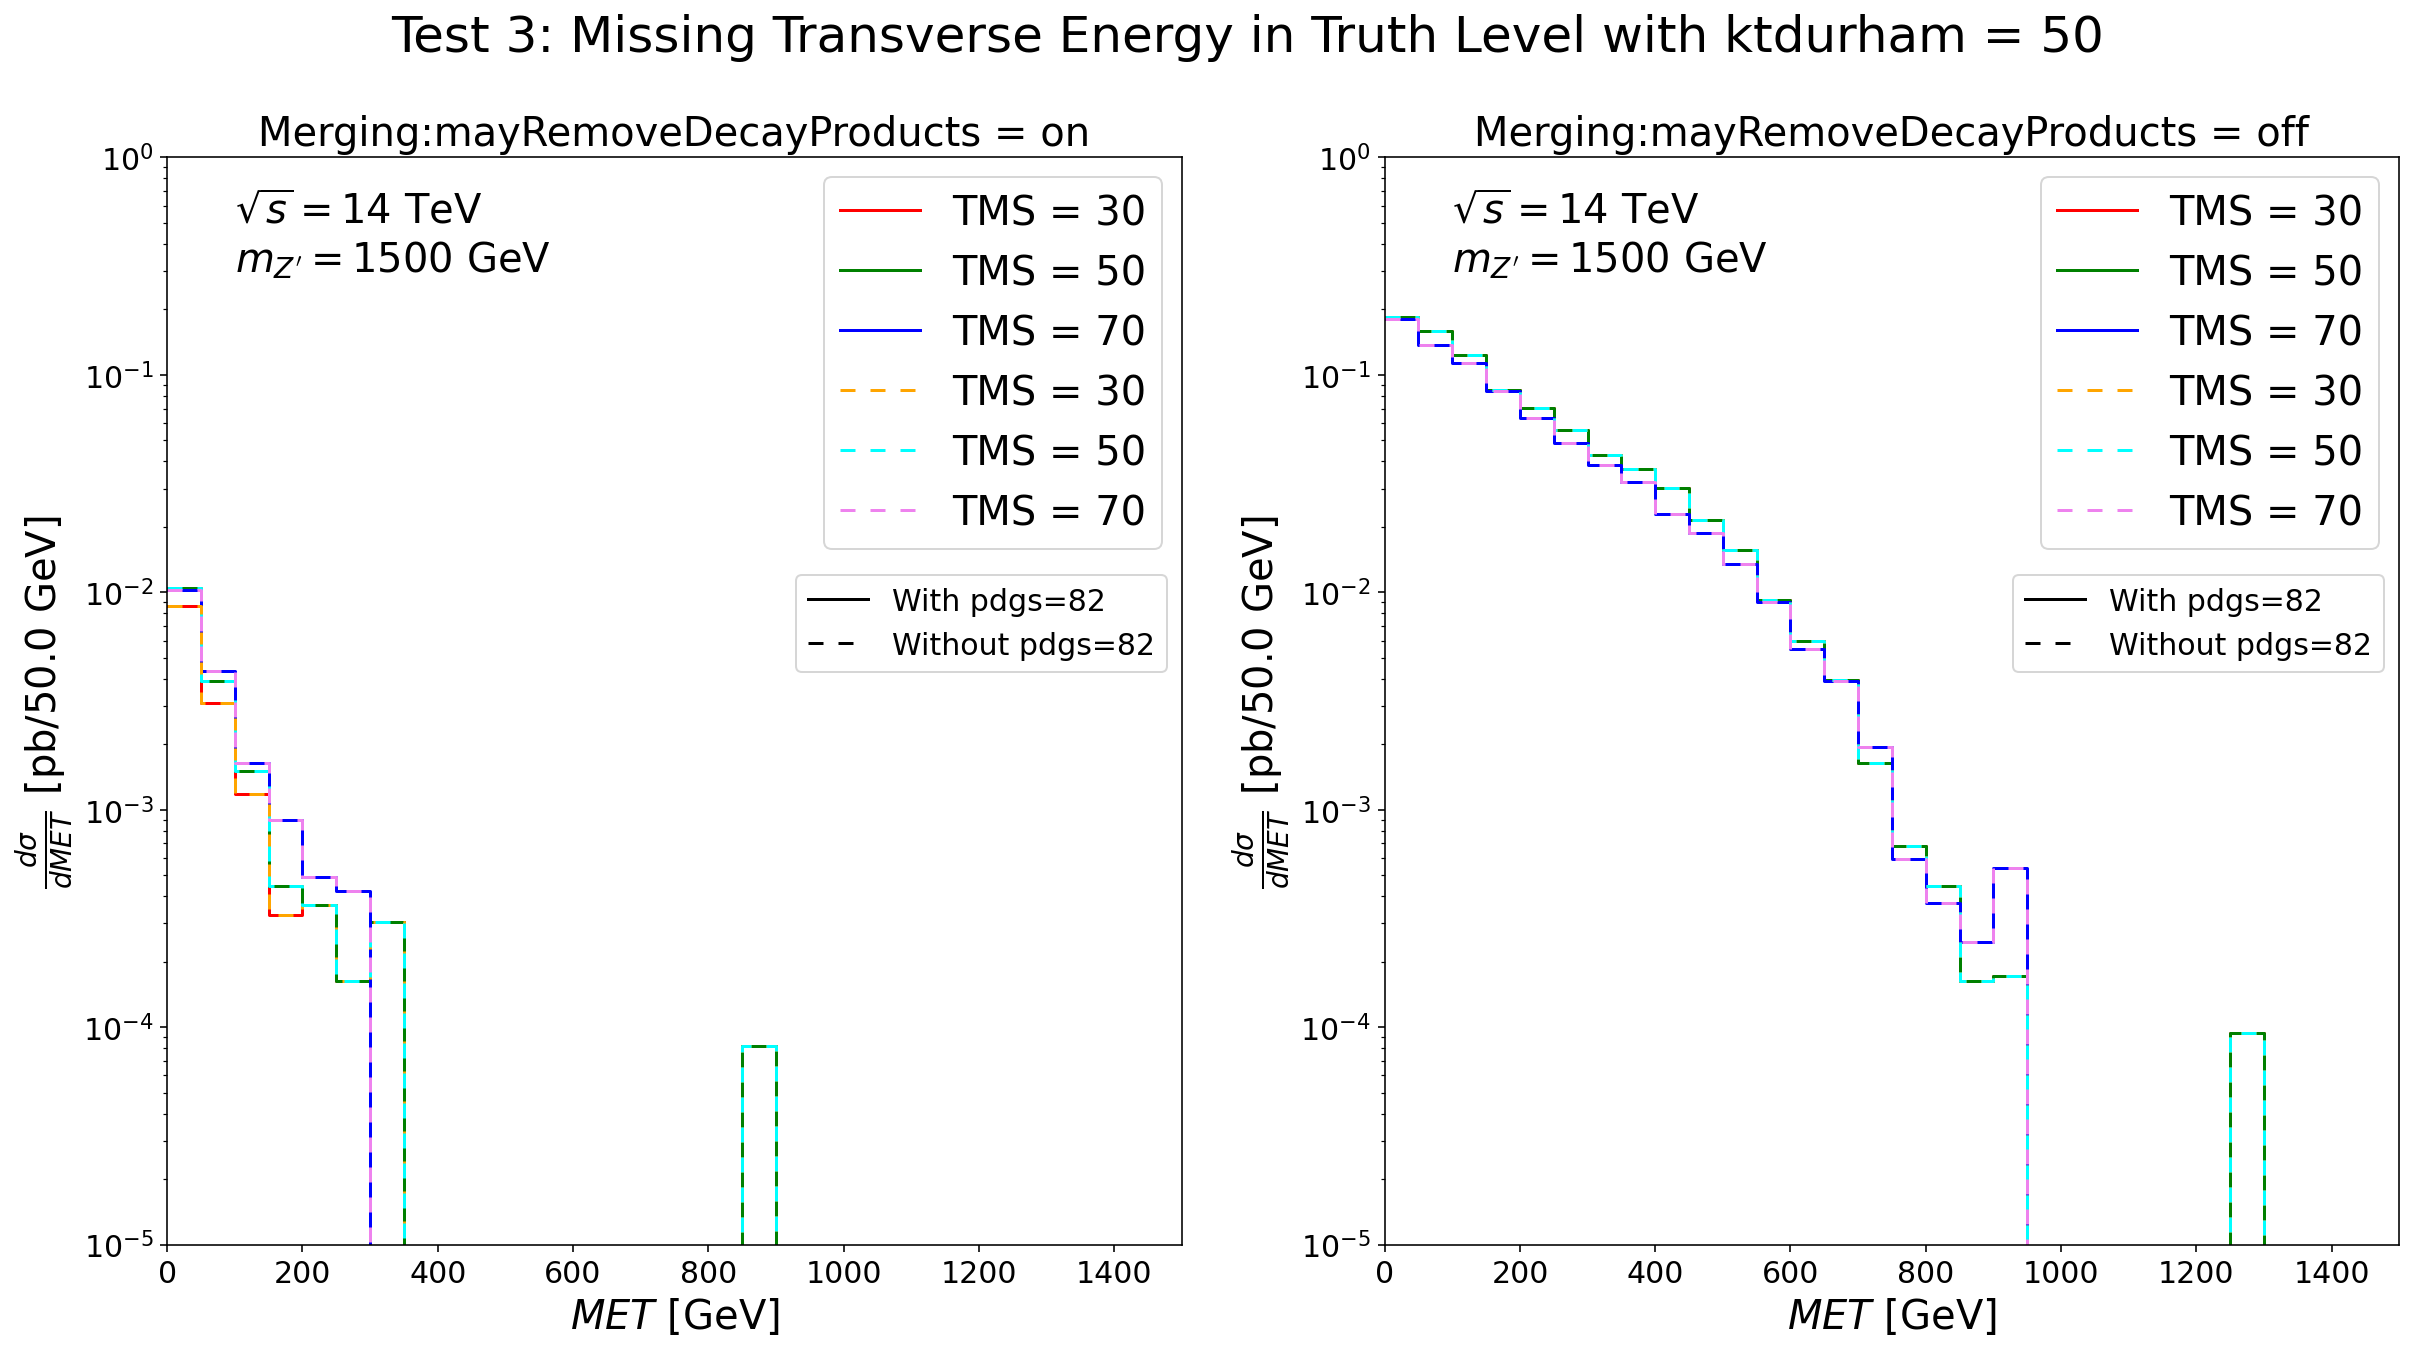

In [34]:
# 1. Figure
fig2_6, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_MET_8_50_30[0], bins=binning, weights=weight_8_50_30[s_t_MET_8_50_30])
hist0_2, bins0_2 = np.histogram(truth_MET_8_50[0], bins=binning, weights=weight_8_50[s_t_MET_8_50])
hist0_3, bins0_3 = np.histogram(truth_MET_8_50_70[0], bins=binning, weights=weight_8_50_70[s_t_MET_8_50_70])
hist0_4, bins0_4 = np.histogram(truth_MET_8_50_30_wo82[0], bins=binning, weights=weight_8_50_30_wo82[s_t_MET_8_50_30_wo82])
hist0_5, bins0_5 = np.histogram(truth_MET_8_50_wo82[0], bins=binning, weights=weight_8_50_wo82[s_t_MET_8_50_wo82])
hist0_6, bins0_6 = np.histogram(truth_MET_8_50_70_wo82[0], bins=binning, weights=weight_8_50_70_wo82[s_t_MET_8_50_70_wo82])

hist1_1, bins1_1 = np.histogram(truth_MET_4_50_30[0], bins=binning, weights=weight_4_50_30[s_t_MET_4_50_30])
hist1_2, bins1_2 = np.histogram(truth_MET_4_50[0], bins=binning, weights=weight_4_50[s_t_MET_4_50])
hist1_3, bins1_3 = np.histogram(truth_MET_4_50_70[0], bins=binning, weights=weight_4_50_70[s_t_MET_4_50_70])
hist1_4, bins1_4 = np.histogram(truth_MET_4_50_30_wo82[0], bins=binning, weights=weight_4_50_30_wo82[s_t_MET_4_50_30_wo82])
hist1_5, bins1_5 = np.histogram(truth_MET_4_50_wo82[0], bins=binning, weights=weight_4_50_wo82[s_t_MET_4_50_wo82])
hist1_6, bins1_6 = np.histogram(truth_MET_4_50_70_wo82[0], bins=binning, weights=weight_4_50_70_wo82[s_t_MET_4_50_70_wo82])

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 30")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2, where='post', color='green', label="TMS = 50")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3, where='post', color='blue', label="TMS = 70")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 30")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2, where='post', color='green', label="TMS = 50")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3, where='post', color='blue', label="TMS = 70")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4, where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5, where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6, where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig2_6.suptitle("Test 3: Missing Transverse Energy in Truth Level with ktdurham = 50", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dMET}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 1500)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 1500)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-3/fig2-6_jT_mRDP_on_off_MET_ktdurham50.pdf")
plt.show()

In [35]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("TMS = 50, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("TMS = 70, Cross-section = {} pb".format(np.sum(hist1_6)[0]))

Merging:mayRemoveDecayProducts = on:
TMS = 30, Cross-section = 0.014211346658385242 pb
TMS = 50, Cross-section = 0.017210953121666803 pb
TMS = 70, Cross-section = 0.018052217124028998 pb
Merging:mayRemoveDecayProducts = off:
TMS = 30, Cross-section = 0.8462222933081707 pb
TMS = 50, Cross-section = 0.8489344991817425 pb
TMS = 70, Cross-section = 0.7749827229537023 pb


In [36]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, {}".format(np.sum(truth_MET_8_50_30[0] - truth_MET_8_50_30_wo82[0])))
print("TMS = 50, {}".format(np.sum(truth_MET_8_50[0] - truth_MET_8_50_wo82[0])))
print("TMS = 70, {}".format(np.sum(truth_MET_8_50_70[0] - truth_MET_8_50_70_wo82[0])))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, {}".format(np.sum(truth_MET_4_50_30[0] - truth_MET_4_50_30_wo82[0])))
print("TMS = 50, {}".format(np.sum(truth_MET_4_50[0] - truth_MET_4_50_wo82[0])))
print("TMS = 70, {}".format(np.sum(truth_MET_4_50_70[0] - truth_MET_4_50_70_wo82[0])))

Merging:mayRemoveDecayProducts = on:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0
Merging:mayRemoveDecayProducts = off:
TMS = 30, 0.0
TMS = 50, 0.0
TMS = 70, 0.0


#### Conclusion: The results of with and without pdgs=82 are the same for ktdurham = 20 & 50.

### 3-3. Event weight distribution

#### 1. Event weight for mRDP = on/off with ktdurham = 20

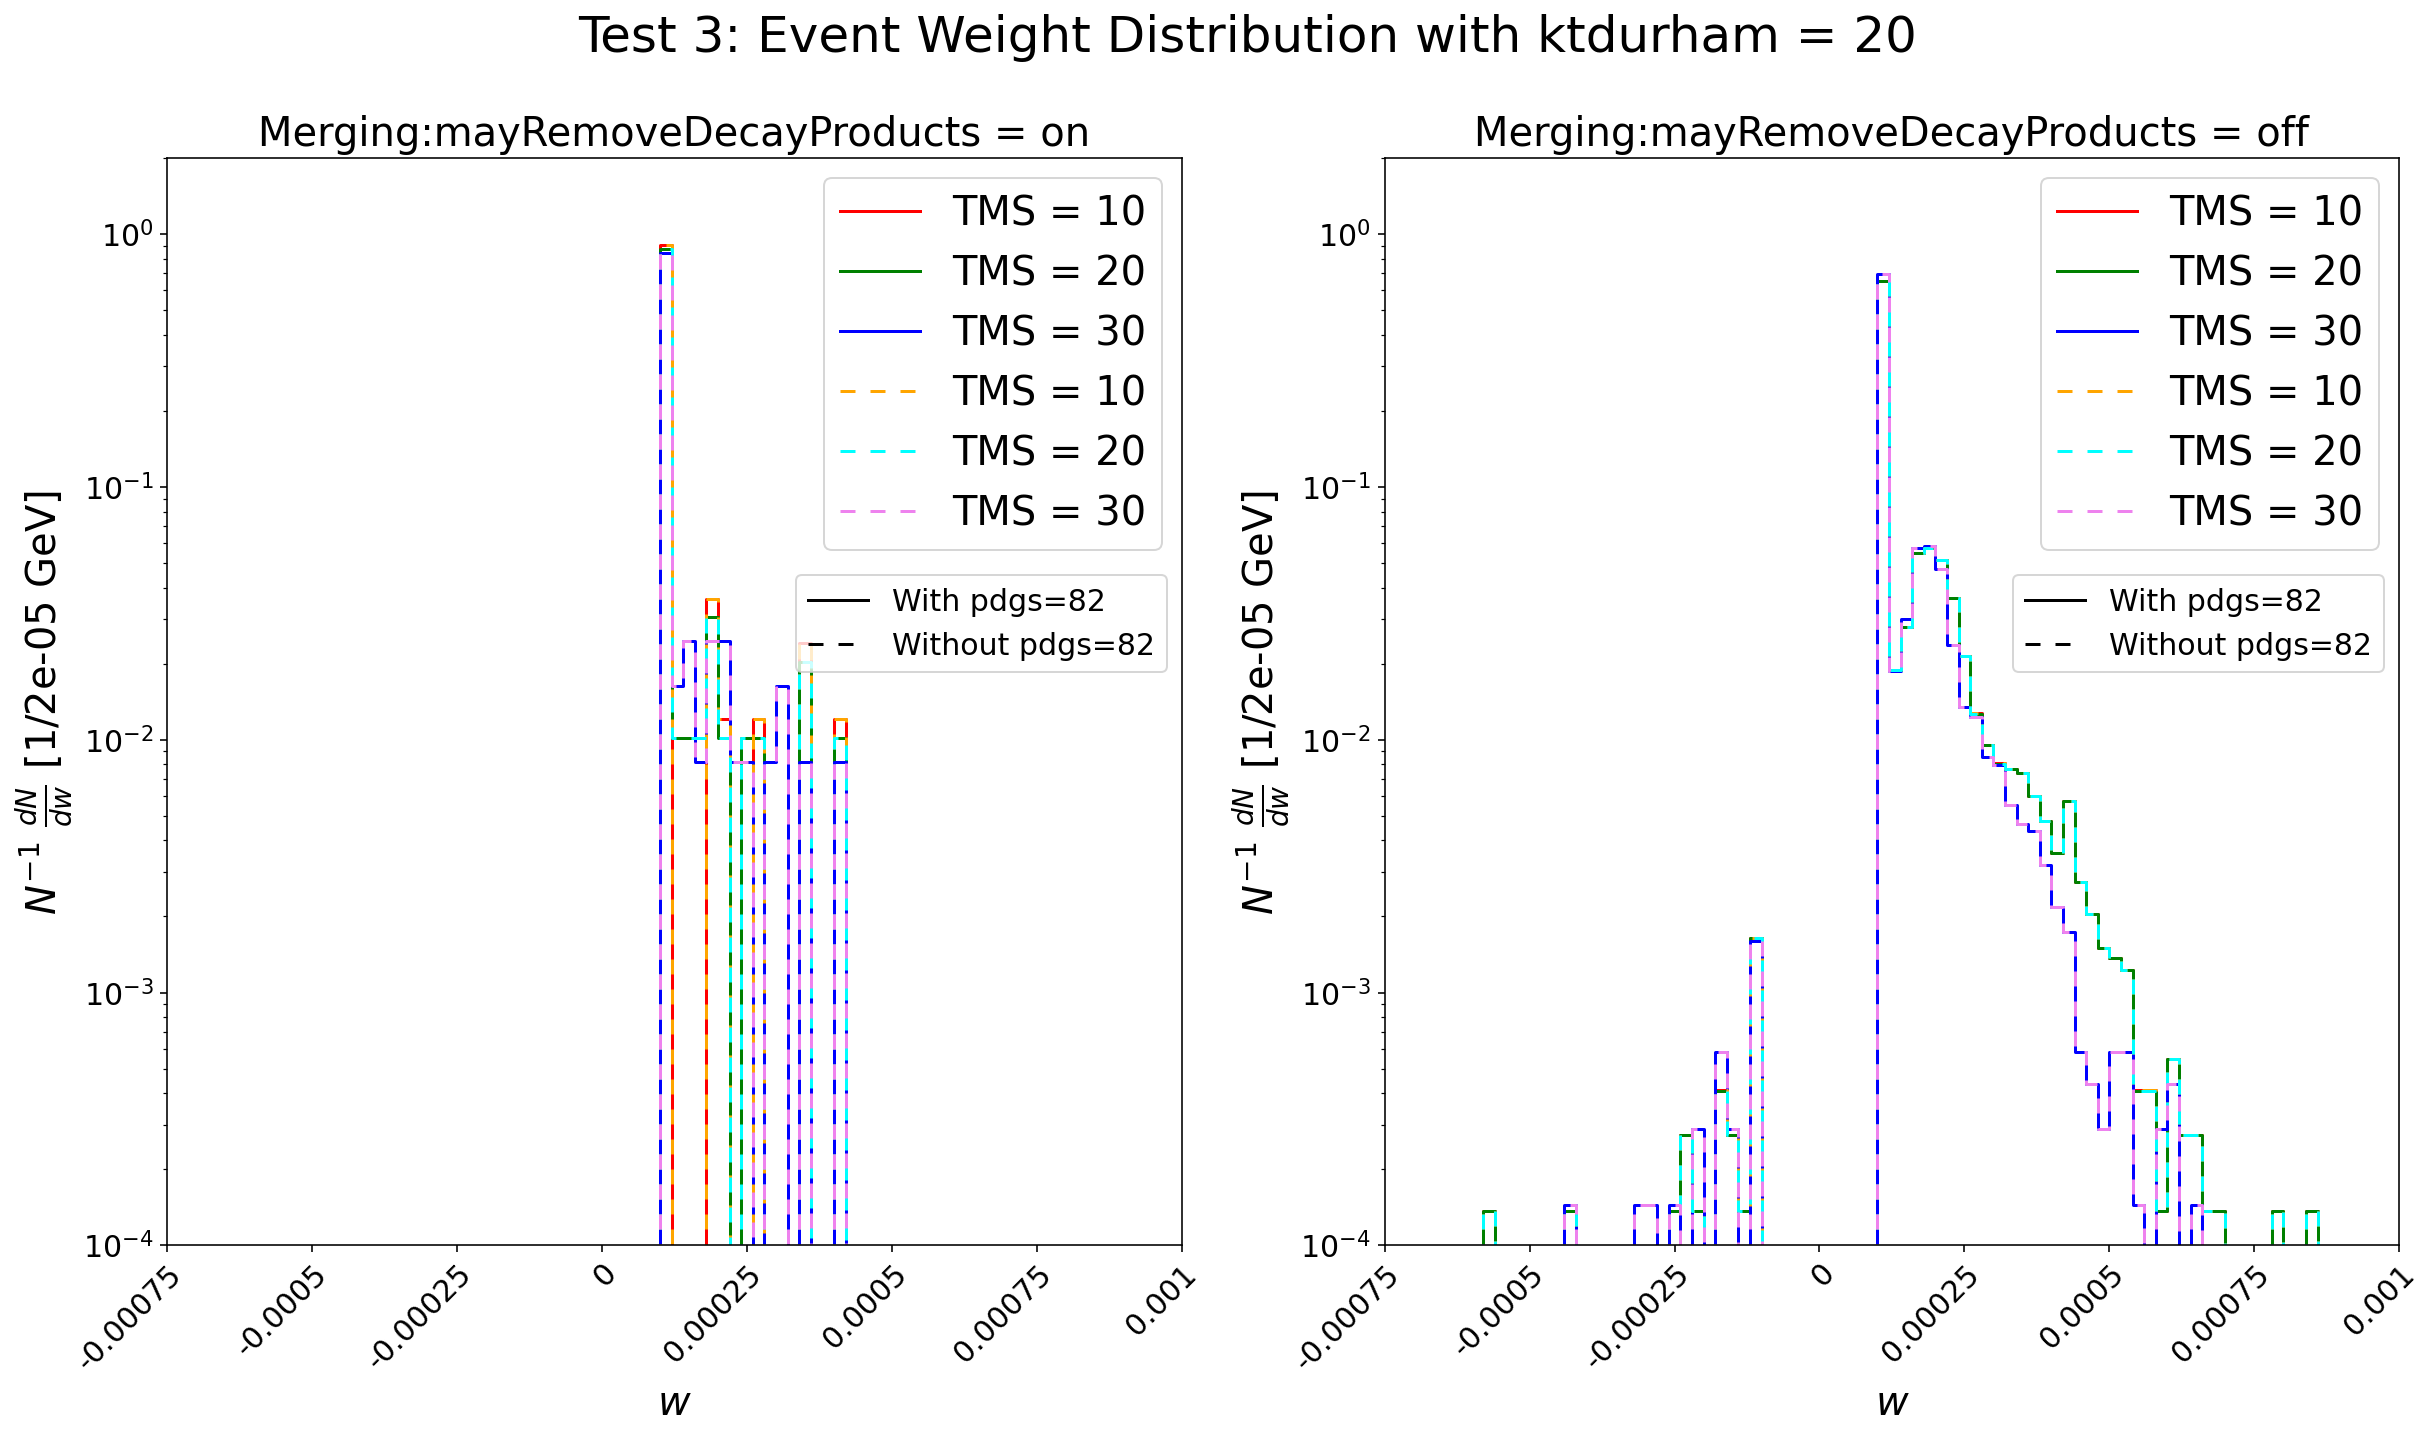

In [37]:
# 1. Figure
fig3_1, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(-0.002, 0.002, 201)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(weight_8_20_10, bins=binning)
hist0_2, bins0_2 = np.histogram(weight_8_20, bins=binning)
hist0_3, bins0_3 = np.histogram(weight_8_20_30, bins=binning)
hist0_4, bins0_4 = np.histogram(weight_8_20_10_wo82, bins=binning)
hist0_5, bins0_5 = np.histogram(weight_8_20_wo82, bins=binning)
hist0_6, bins0_6 = np.histogram(weight_8_20_30_wo82, bins=binning)

hist1_1, bins1_1 = np.histogram(weight_4_20_10, bins=binning)
hist1_2, bins1_2 = np.histogram(weight_4_20, bins=binning)
hist1_3, bins1_3 = np.histogram(weight_4_20_30, bins=binning)
hist1_4, bins1_4 = np.histogram(weight_4_20_10_wo82, bins=binning)
hist1_5, bins1_5 = np.histogram(weight_4_20_wo82, bins=binning)
hist1_6, bins1_6 = np.histogram(weight_4_20_30_wo82, bins=binning)

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1/np.sum(hist0_1), where='post', color='red', label="TMS = 10")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2/np.sum(hist0_2), where='post', color='green', label="TMS = 20")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3/np.sum(hist0_3), where='post', color='blue', label="TMS = 30")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4/np.sum(hist0_4), where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5/np.sum(hist0_5), where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6/np.sum(hist0_6), where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1/np.sum(hist1_1), where='post', color='red', label="TMS = 10")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2/np.sum(hist1_2), where='post', color='green', label="TMS = 20")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3/np.sum(hist1_3), where='post', color='blue', label="TMS = 30")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4/np.sum(hist1_4), where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 10")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5/np.sum(hist1_5), where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 20")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6/np.sum(hist1_6), where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 30")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig3_1.suptitle("Test 3: Event Weight Distribution with ktdurham = 20", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$N^{-1}\ \\frac{dN}{dw}$ [1/"+str((binning[-1]-binning[0])/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$w$", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$w$", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(-0.00075, 0.001)
axs[0].set_ylim(1/10000, 2)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[0].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_0 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[0].set_xticklabels(xticklabels_0)
axs[1].set_xlim(-0.00075, 0.001)
axs[1].set_ylim(1/10000, 2)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)
axs[1].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_1 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[1].set_xticklabels(xticklabels_1)
# Rotate the tick labels and set their alignment.
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.savefig("figures-3/fig3-1_weight_mRDP_on_off_ktdurham20.pdf")
plt.show()

In [38]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, Number of events = {}".format(np.sum(hist0_4)))
print("TMS = 20, Number of events = {}".format(np.sum(hist0_5)))
print("TMS = 30, Number of events = {}".format(np.sum(hist0_6)))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, Number of events = {}".format(np.sum(hist1_4)))
print("TMS = 20, Number of events = {}".format(np.sum(hist1_5)))
print("TMS = 30, Number of events = {}".format(np.sum(hist1_6)))

Merging:mayRemoveDecayProducts = on:
TMS = 10, Number of events = 83
TMS = 20, Number of events = 98
TMS = 30, Number of events = 122
Merging:mayRemoveDecayProducts = off:
TMS = 10, Number of events = 7314
TMS = 20, Number of events = 7322
TMS = 30, Number of events = 6903


In [39]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 10, {}".format(np.sum(weight_8_20_10 - weight_8_20_10_wo82)))
print("TMS = 20, {}".format(np.sum(weight_8_20 - weight_8_20_wo82)))
print("TMS = 30, {}".format(np.sum(weight_8_20_30 - weight_8_20_30_wo82)))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 10, {}".format(np.sum(weight_4_20_10 - weight_4_20_10_wo82)))
print("TMS = 20, {}".format(np.sum(weight_4_20 - weight_4_20_wo82)))
print("TMS = 30, {}".format(np.sum(weight_4_20_30 - weight_4_20_30_wo82)))

Merging:mayRemoveDecayProducts = on:
TMS = 10, [0.]
TMS = 20, [0.]
TMS = 30, [0.]
Merging:mayRemoveDecayProducts = off:
TMS = 10, [0.]
TMS = 20, [0.]
TMS = 30, [0.]


#### 2. Event weight for mRDP = on/off with ktdurham = 50

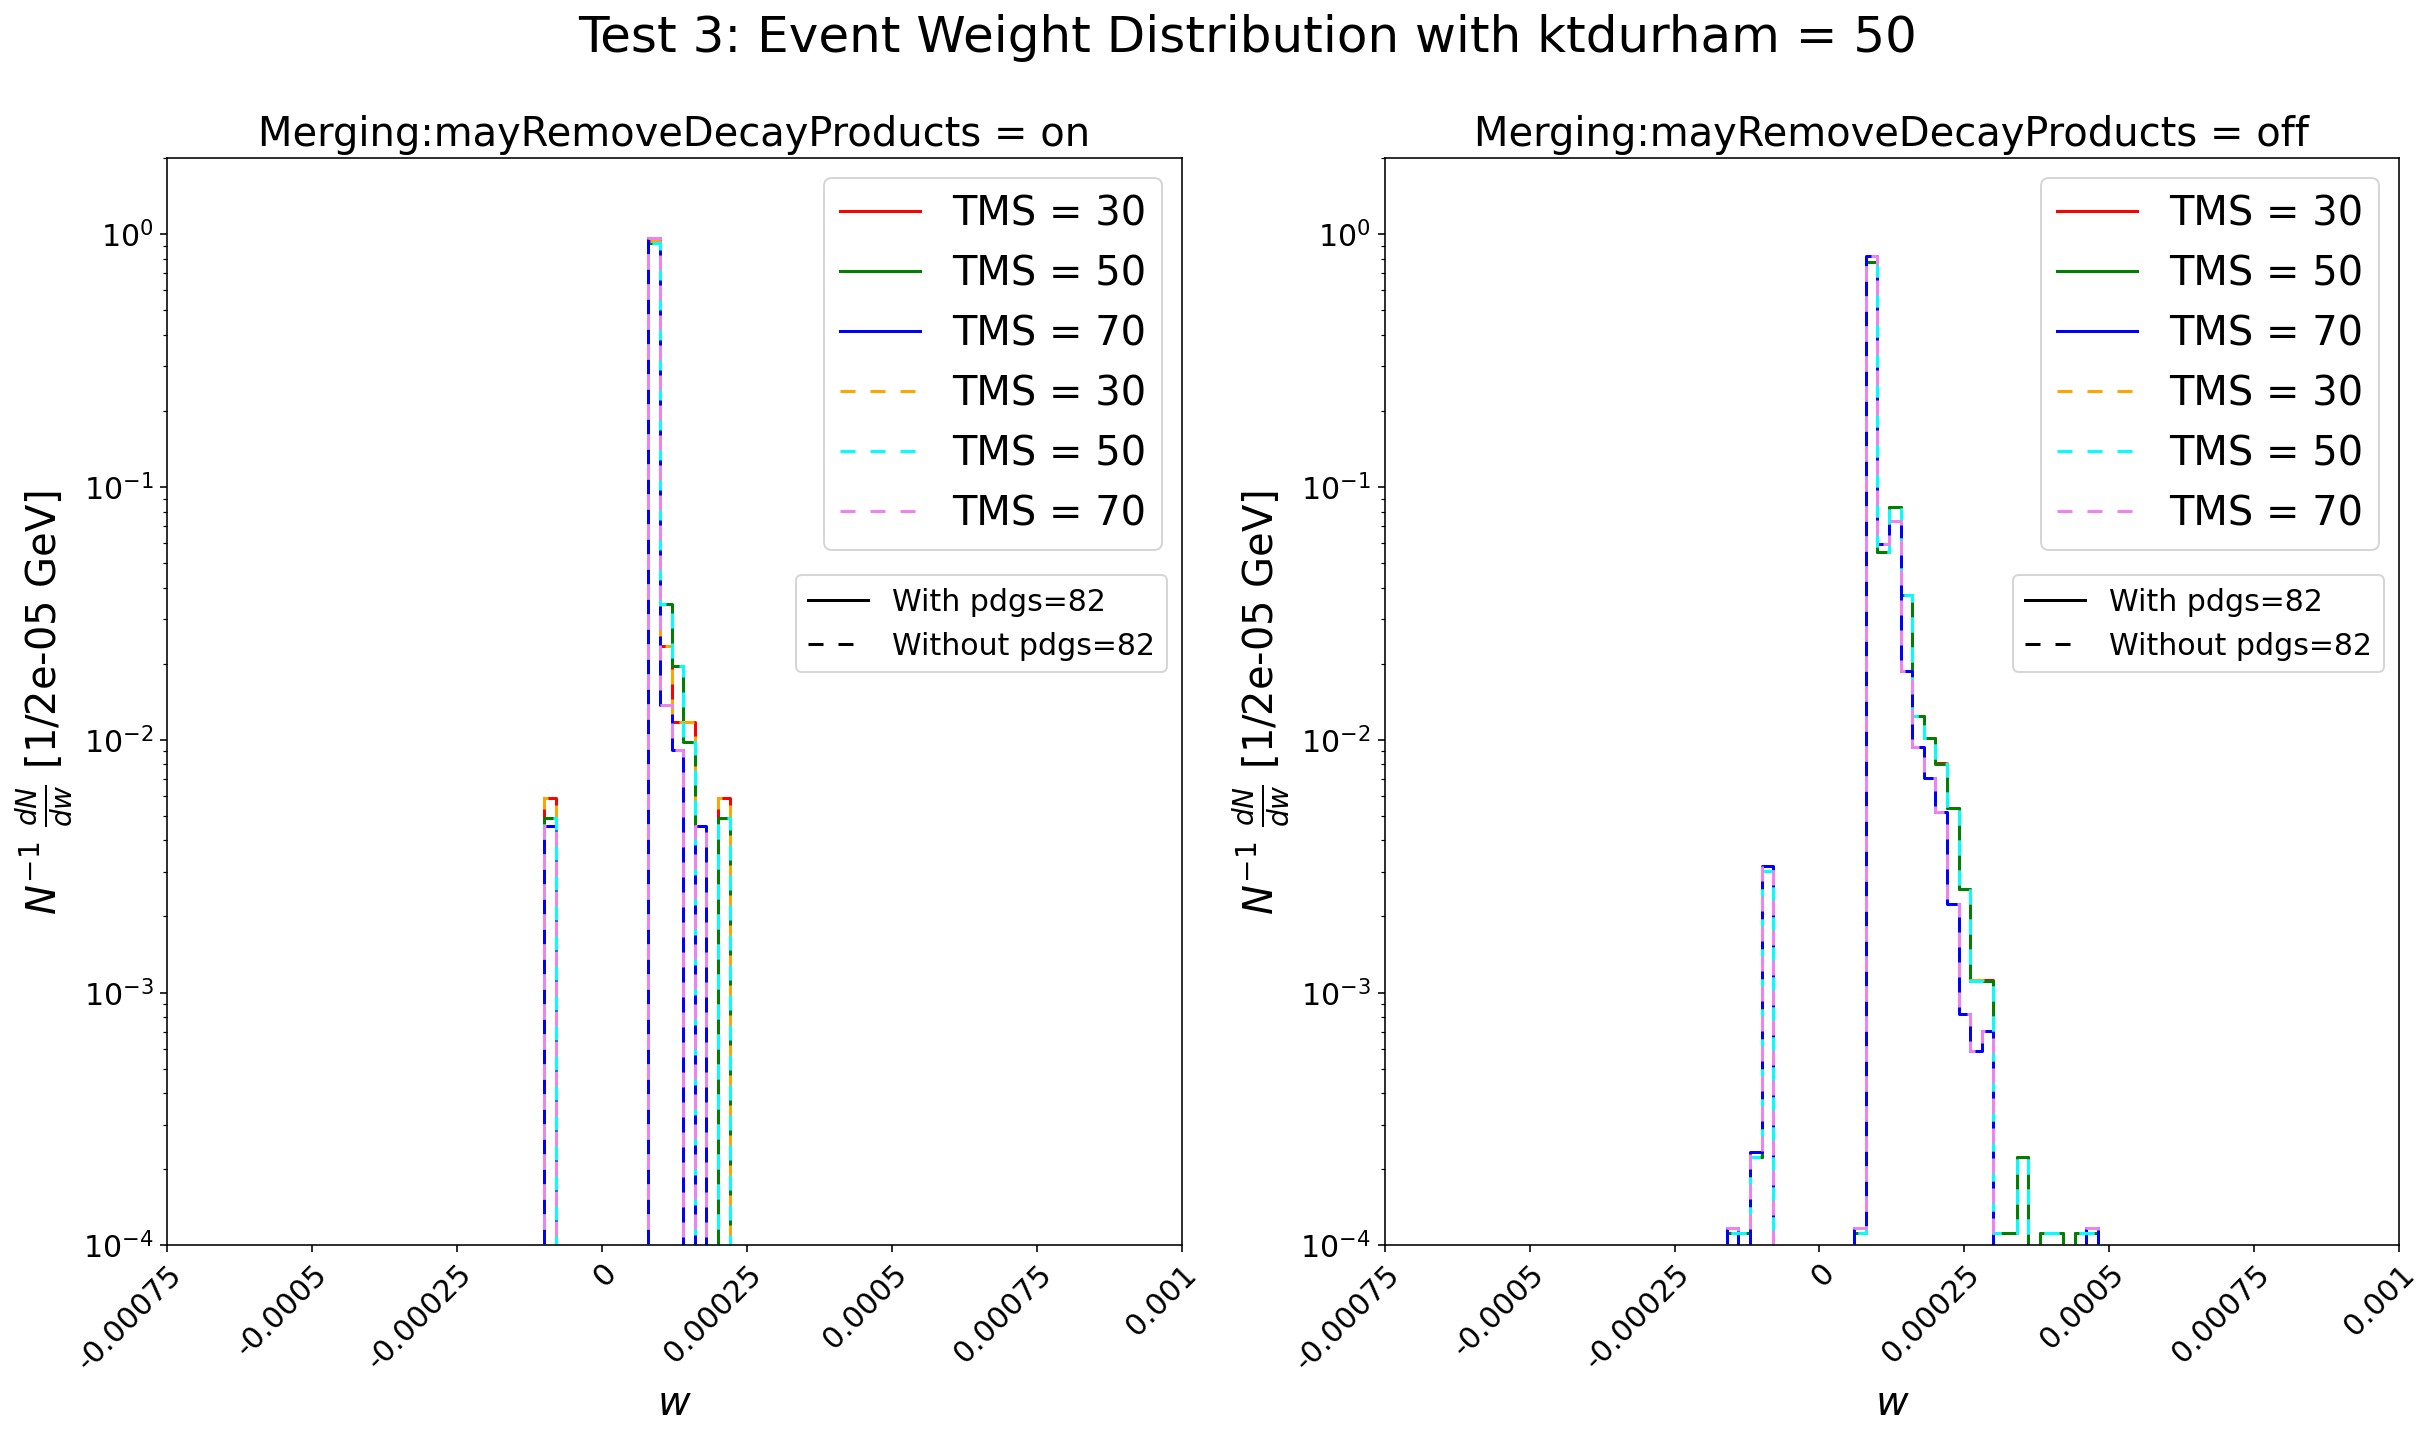

In [40]:
# 1. Figure
fig3_2, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(-0.002, 0.002, 201)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(weight_8_50_30, bins=binning)
hist0_2, bins0_2 = np.histogram(weight_8_50, bins=binning)
hist0_3, bins0_3 = np.histogram(weight_8_50_70, bins=binning)
hist0_4, bins0_4 = np.histogram(weight_8_50_30_wo82, bins=binning)
hist0_5, bins0_5 = np.histogram(weight_8_50_wo82, bins=binning)
hist0_6, bins0_6 = np.histogram(weight_8_50_70_wo82, bins=binning)

hist1_1, bins1_1 = np.histogram(weight_4_50_30, bins=binning)
hist1_2, bins1_2 = np.histogram(weight_4_50, bins=binning)
hist1_3, bins1_3 = np.histogram(weight_4_50_70, bins=binning)
hist1_4, bins1_4 = np.histogram(weight_4_50_30_wo82, bins=binning)
hist1_5, bins1_5 = np.histogram(weight_4_50_wo82, bins=binning)
hist1_6, bins1_6 = np.histogram(weight_4_50_70_wo82, bins=binning)

# 3. Plot
line0_1, = axs[0].step(bins0_1[:-1], hist0_1/np.sum(hist0_1), where='post', color='red', label="TMS = 30")
line0_2, = axs[0].step(bins0_2[:-1], hist0_2/np.sum(hist0_2), where='post', color='green', label="TMS = 50")
line0_3, = axs[0].step(bins0_3[:-1], hist0_3/np.sum(hist0_3), where='post', color='blue', label="TMS = 70")
line0_4, = axs[0].step(bins0_4[:-1], hist0_4/np.sum(hist0_4), where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line0_5, = axs[0].step(bins0_5[:-1], hist0_5/np.sum(hist0_5), where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line0_6, = axs[0].step(bins0_6[:-1], hist0_6/np.sum(hist0_6), where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line0_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line0_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

line1_1, = axs[1].step(bins1_1[:-1], hist1_1/np.sum(hist1_1), where='post', color='red', label="TMS = 30")
line1_2, = axs[1].step(bins1_2[:-1], hist1_2/np.sum(hist1_2), where='post', color='green', label="TMS = 50")
line1_3, = axs[1].step(bins1_3[:-1], hist1_3/np.sum(hist1_3), where='post', color='blue', label="TMS = 70")
line1_4, = axs[1].step(bins1_4[:-1], hist1_4/np.sum(hist1_4), where='post',
                       color='orange', linestyle=(0, (5, 5)), label="TMS = 30")
line1_5, = axs[1].step(bins1_5[:-1], hist1_5/np.sum(hist1_5), where='post',
                       color='cyan', linestyle=(0, (5, 5)), label="TMS = 50")
line1_6, = axs[1].step(bins1_6[:-1], hist1_6/np.sum(hist1_6), where='post',
                       color='violet', linestyle=(0, (5, 5)), label="TMS = 70")
line1_7, = axs[0].plot([0, 0], [0, 0], color='black', label="With pdgs=82")
line1_8, = axs[0].plot([0, 0], [0, 0], color='black', linestyle=(0, (5, 5)), label="Without pdgs=82")

# 4. axes setting
# title and legend
fig3_2.suptitle("Test 3: Event Weight Distribution with ktdurham = 50", fontsize=25)
legend0_1 = axs[0].legend(handles=[line0_1, line0_2, line0_3, line0_4, line0_5, line0_6], fontsize=20)
axs[0].add_artist(legend0_1)
axs[0].legend(handles=[line0_7, line0_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)

legend1_1 = axs[1].legend(handles=[line1_1, line1_2, line1_3, line1_4, line1_5, line1_6], fontsize=20)
axs[1].add_artist(legend1_1)
axs[1].legend(handles=[line1_7, line1_8], loc='upper right', bbox_to_anchor=(1, 0.63), fontsize=15)
# sub-title and x & y labels
ylabel = "$N^{-1}\ \\frac{dN}{dw}$ [1/"+str((binning[-1]-binning[0])/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$w$", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$w$", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(-0.00075, 0.001)
axs[0].set_ylim(1/10000, 2)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[0].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_0 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[0].set_xticklabels(xticklabels_0)
axs[1].set_xlim(-0.00075, 0.001)
axs[1].set_ylim(1/10000, 2)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)
axs[1].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_1 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[1].set_xticklabels(xticklabels_1)
# Rotate the tick labels and set their alignment.
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.savefig("figures-3/fig3-2_weight_mRDP_on_off_ktdurham50.pdf")
plt.show()

In [41]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, Number of events = {}".format(np.sum(hist0_4)))
print("TMS = 50, Number of events = {}".format(np.sum(hist0_5)))
print("TMS = 70, Number of events = {}".format(np.sum(hist0_6)))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, Number of events = {}".format(np.sum(hist1_4)))
print("TMS = 50, Number of events = {}".format(np.sum(hist1_5)))
print("TMS = 70, Number of events = {}".format(np.sum(hist1_6)))

Merging:mayRemoveDecayProducts = on:
TMS = 30, Number of events = 170
TMS = 50, Number of events = 204
TMS = 70, Number of events = 219
Merging:mayRemoveDecayProducts = off:
TMS = 30, Number of events = 8926
TMS = 50, Number of events = 8957
TMS = 70, Number of events = 8514


In [42]:
print("Merging:mayRemoveDecayProducts = on:")
print("TMS = 30, {}".format(np.sum(weight_8_50_30 - weight_8_50_30_wo82)))
print("TMS = 50, {}".format(np.sum(weight_8_50 - weight_8_50_wo82)))
print("TMS = 70, {}".format(np.sum(weight_8_50_70 - weight_8_50_70_wo82)))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("TMS = 30, {}".format(np.sum(weight_4_50_30 - weight_4_50_30_wo82)))
print("TMS = 50, {}".format(np.sum(weight_4_50 - weight_4_50_wo82)))
print("TMS = 70, {}".format(np.sum(weight_4_50_70 - weight_4_50_70_wo82)))

Merging:mayRemoveDecayProducts = on:
TMS = 30, [0.]
TMS = 50, [0.]
TMS = 70, [0.]
Merging:mayRemoveDecayProducts = off:
TMS = 30, [0.]
TMS = 50, [0.]
TMS = 70, [0.]


#### Conclusion: The results of with and without pdgs=82 are the same for ktdurham = 20 & 50.